# Проект "Промышленность" 

---

# Описание исследования

---
Чтобы оптимизировать производственные расходы, металлургический комбинат ***«Стальная птица»*** решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого комбинату нужно контролировать температуру сплава. Наша задача — построить модель, которая будет её предсказывать. 

> Заказчик хочет использовать разработанную модель для имитации технологического процесса

---

# Цель исследования

---

Провести анализ данных, полученных от заказчика. Выявить закономерности и отфильтровать эти данные. На основании предобработанных данных создать модели МО, которые смогут предсказывать температуру сплава.

---

# Задачи исследования

---

Провести предобработку данных. Посмотреть данные на наличие дубликатов и пропущенных значений. Выполнить исследовательский анализ, для определения аномальных значений и выбросов. Посмотреть как распределяются наши признаки. Отсеять лишние признаки на основе корреляционного анализа. Аналетически выявить признаки, которые являются неинформативными при обучении модели. На основе предобработанных данных сформировать обучающую и тестовые выборки, которые необходимы для обучения моделей. Обучить модели различными способами. Проанализировать полученные модели и выбрать лучшую, на основании предпочтений заказчика.

---

# Исходные данные

---

Для проведения исследования и создания модели заказчик передал нам CSV-файлы с данными, они состоят из нескольких файлов, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;


- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);


- `data_bulk_time_new.csv` — данные о подаче сыпучих материалов (время);


- `data_gas_new.csv` — данные о продувке сплава газом;


- `data_temp_new.csv` — результаты измерения температуры;


- `data_wire_new.csv` — данные о проволочных материалах (объём);


- `data_wire_time_new.csv` — данные о проволочных материалах (время).

---

<h1>Содержание<span class="tocSkip"></span></h1>

---


**Шаг №1. Загрузка данных**

- 1. [Установка и импортирование библиотек](#section_1)
- 2. [Выгрузка и первичный осмотр данных](#section_2)
- 3. [Изменение типов данных и названий столбцов](#section_3)
- 4. [Проверка на наличие пропусков](#section_4)
- 5. [Проверка на наличие дубликатов](#section_5)
- 6. [Вывод](#section_6)

**Шаг №2. Исследовательский анализ и предобработка данных**

- 1. [Анализ df1 (Данные об электродах)](#section_7)
- 2. [Анализ df2 (Данные об объеме подачи сыпучих материало)](#section_8)
- 3. [Анализ df4 (Данные о продувке сплава газом)](#section_9)
- 4. [Анализ df5 (Данные о измерениях температуры)](#section_10)
- 5. [Анализ df6 (Данные об объеме подачи проволочных материалов)](#section_11)
- 6. [Вывод](#section_12)

**Шаг №3. Объединение данных**

- 1. [Подготовка и группировка df1](#section_13)
- 2. [Подготовка и группировка df2](#section_14)
- 3. [Подготовка и группировка df5](#section_15)
- 4. [Подготовка и группировка df6](#section_16)
- 5. [Объединение данных в итоговый датафрейм](#section_17)
- 6. [Вывод](#section_18)

**Шаг №4. Исследовательский анализ и предобработка данных объединённого датафрейма**

- 1. [Графический и статистический анализ итогового датафрейма](#section_19)
- 2. [Корреляционный анализ итогового датафрейма](#section_20)
- 3. [Вывод](#section_21)

**Шаг №5. Подготовка данных**

**Шаг №6. Обучение моделей**

- 1. [Дерево регрессии](#section_22)
- 2. [kNN](#section_23)
- 3. [Случайный лес](#section_24)
- 4. [SVR](#section_25)
- 5. [CatBoost](#section_26)

**Шаг №7. Выбор лучшей модели**

- 1. [Лучшая модель](#section_27)
- 2. [Метрика на тестовой выборке](#section_28)
- 3. [Анализ важности признаков](#section_29)
- 4. [Вывод](#section_30)

**Шаг №8. Итоговый вывод**


## Загрузка данных

<a id='section_1'></a>

###  Установка и импортирование библиотек

In [1]:
#Установка/обновление библиотек:

!pip install numba -U -q
!pip install numpy==1.24.4 -q
!pip install phik -q
!pip install scipy==1.11.3 -q
!pip install scikit-learn==1.3.1 -q
!pip install matplotlib==3.8.4 -q
!pip install seaborn==0.13.2 -q
!pip install catboost -q
!pip install lightgbm -q
!pip install shap -U -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.


In [2]:
# импорт библиотек, модулей и функций
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix
import warnings
import shap
import os

from scipy import stats as st

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import (train_test_split,
                                     RandomizedSearchCV)

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.dummy import DummyRegressor


from sklearn.preprocessing import (StandardScaler, 
                                   MinMaxScaler, 
                                   RobustScaler)

from sklearn.metrics import (mean_absolute_error,                               
                             make_scorer)

from catboost import CatBoostRegressor

In [3]:
#Константы
RANDOM_STATE = 30924
TEST_SIZE = 0.25

<a id='section_2'></a>

### Выгрузка и первичный осмотр данных

In [4]:
# Пути
local_path = '/datasets/'
url_path = 'https://code.s3.yandex.net/datasets/'

# Названия файлов
files = [
    'data_arc_new.csv',
    'data_bulk_new.csv',
    'data_bulk_time_new.csv',
    'data_gas_new.csv',
    'data_temp_new.csv',
    'data_wire_new.csv',
    'data_wire_time_new.csv'
]

# Список для датафреймов
loaded_df = []

# Проверка и загрузка файлов
for idx, file in enumerate(files, start=1):
    df_name = f'df{idx}'  # Создание имен df1, df2 и т.д.
    
    # Проверка локального пути
    local_file = os.path.join(local_path, file)
    if os.path.exists(local_file):
        print(f"Файл {file} - загружен из локальной директории")
        df = pd.read_csv(local_file)
        globals()[df_name] = df
        loaded_df.append(df)
        
    # Проверка URL
    else:
        url_file = url_path + file
        if url_exists(url_file):
            print(f"Файл {file} - загружен по URL")
            df = pd.read_csv(url_file)
            globals()[df_name] = df
            loaded_df.append(df)
        else:
            print(f"Файл {file} - отсутствует по указанным путям")

Файл data_arc_new.csv - загружен из локальной директории
Файл data_bulk_new.csv - загружен из локальной директории
Файл data_bulk_time_new.csv - загружен из локальной директории
Файл data_gas_new.csv - загружен из локальной директории
Файл data_temp_new.csv - загружен из локальной директории
Файл data_wire_new.csv - загружен из локальной директории
Файл data_wire_time_new.csv - загружен из локальной директории


In [5]:
# Счетчик:
i = 1
# Просмотрим данные
for df in loaded_df:
    print(f'Датафрейм №{i}:')
    display(df.head())
    print()
    df.info()
    print('-'*125)
    i+=1

Датафрейм №1:


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB
-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №2:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №3:


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №4:


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №5:


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB
-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №6:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №7:


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
-----------------------------------------------------------------------------------------------------------------------------


Первичный осмотр данных показал:

> Во всех датафреймах, кроме ***data_arc_new***, есть **пропуска**

> В датафреймах имеются **некорректные типы данных**, которые нужно изменить

<a id='section_3'></a>

### Изменение типов данных и названий столбцов

> **df1 (данные об электродах):**

In [6]:
df1 = df1.rename(columns={'Начало нагрева дугой':'start_heating', 
                          'Конец нагрева дугой':'end_heating', 
                          'Активная мощность':'active_power', 
                          'Реактивная мощность':'reactive_power'})

df1['start_heating'] = pd.to_datetime(df1['start_heating'], errors='coerce')
df1['end_heating'] = pd.to_datetime(df1['end_heating'], errors='coerce')

df1.head()

,key,start_heating,end_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14876 non-null  int64         
 1   start_heating   14876 non-null  datetime64[ns]
 2   end_heating     14876 non-null  datetime64[ns]
 3   active_power    14876 non-null  float64       
 4   reactive_power  14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


> **df2 (данные о подаче сыпучих материалов - объем)**:

In [8]:
df2.columns = df2.columns.str.replace(' ', '_').str.lower()

df2.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


> **df3 (данные о подаче сыпучих материалов - время):**

In [9]:
df3.columns = df3.columns.str.replace(' ', '_').str.lower()
df3.columns = ['time_' + column if column != 'key' else column for column in df3.columns]

for column in df3.columns:
    if column != 'key':
        df3[column] = pd.to_datetime(df3[column], errors='coerce')
        
df3.head()

,key,time_bulk_1,time_bulk_2,time_bulk_3,time_bulk_4,time_bulk_5,time_bulk_6,time_bulk_7,time_bulk_8,time_bulk_9,time_bulk_10,time_bulk_11,time_bulk_12,time_bulk_13,time_bulk_14,time_bulk_15
0,1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:58:00,NaT,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:34:12,2019-05-03 13:30:47


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           3129 non-null   int64         
 1   time_bulk_1   252 non-null    datetime64[ns]
 2   time_bulk_2   22 non-null     datetime64[ns]
 3   time_bulk_3   1298 non-null   datetime64[ns]
 4   time_bulk_4   1014 non-null   datetime64[ns]
 5   time_bulk_5   77 non-null     datetime64[ns]
 6   time_bulk_6   576 non-null    datetime64[ns]
 7   time_bulk_7   25 non-null     datetime64[ns]
 8   time_bulk_8   1 non-null      datetime64[ns]
 9   time_bulk_9   19 non-null     datetime64[ns]
 10  time_bulk_10  176 non-null    datetime64[ns]
 11  time_bulk_11  177 non-null    datetime64[ns]
 12  time_bulk_12  2450 non-null   datetime64[ns]
 13  time_bulk_13  18 non-null     datetime64[ns]
 14  time_bulk_14  2806 non-null   datetime64[ns]
 15  time_bulk_15  2248 non-null   datetime

> **df4 (данные о продувке сплава газом):**

In [11]:
df4 = df4.rename(columns={'Газ 1':'gas_1'})

df4.head()

,key,gas_1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


> **df5 (результаты измерения температуры):**

In [12]:
df5 = df5.rename(columns={'Время замера':'measurement_time', 'Температура':'temperature'})

df5['measurement_time'] = pd.to_datetime(df5['measurement_time'], errors='coerce')

df5.head()

,key,measurement_time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [13]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               18092 non-null  int64         
 1   measurement_time  18092 non-null  datetime64[ns]
 2   temperature       14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 424.2 KB


> **df6 (данные о проволочных материалах - объем):**

In [14]:
df6.columns = df6.columns.str.replace(' ', '_').str.lower()

df6.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> **df7 (данные о проволочных материалах - время):**

In [15]:
df7.columns = df7.columns.str.replace(' ', '_').str.lower()

df7.columns = ['time_' + column if column != 'key' else column for column in df7.columns]

for column in df7.columns:
    if column != 'key':
        df7[column] = pd.to_datetime(df7[column], errors='coerce')
        
df7.head()        

,key,time_wire_1,time_wire_2,time_wire_3,time_wire_4,time_wire_5,time_wire_6,time_wire_7,time_wire_8,time_wire_9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [16]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   key          3081 non-null   int64         
 1   time_wire_1  3055 non-null   datetime64[ns]
 2   time_wire_2  1079 non-null   datetime64[ns]
 3   time_wire_3  63 non-null     datetime64[ns]
 4   time_wire_4  14 non-null     datetime64[ns]
 5   time_wire_5  1 non-null      datetime64[ns]
 6   time_wire_6  73 non-null     datetime64[ns]
 7   time_wire_7  11 non-null     datetime64[ns]
 8   time_wire_8  19 non-null     datetime64[ns]
 9   time_wire_9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


> Теперь **типы данных** и **названия столбцов** - **корректны**

<a id='section_4'></a>

### Проверка на наличие пропусков

In [17]:
i = 1
for df in loaded_df:
    print(f'Датафрейм №{i}')
    print(f'Размер таблицы:{df.shape}')
    display(df.isna().sum())
    print('-'*125)
    i+=1

Датафрейм №1
Размер таблицы:(14876, 5)


key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64

-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №2
Размер таблицы:(3129, 16)


key           0
bulk_1     2877
bulk_2     3107
bulk_3     1831
bulk_4     2115
bulk_5     3052
bulk_6     2553
bulk_7     3104
bulk_8     3128
bulk_9     3110
bulk_10    2953
bulk_11    2952
bulk_12     679
bulk_13    3111
bulk_14     323
bulk_15     881
dtype: int64

-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №3
Размер таблицы:(3129, 16)


key                0
time_bulk_1     2877
time_bulk_2     3107
time_bulk_3     1831
time_bulk_4     2115
time_bulk_5     3052
time_bulk_6     2553
time_bulk_7     3104
time_bulk_8     3128
time_bulk_9     3110
time_bulk_10    2953
time_bulk_11    2952
time_bulk_12     679
time_bulk_13    3111
time_bulk_14     323
time_bulk_15     881
dtype: int64

-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №4
Размер таблицы:(3239, 2)


key      0
Газ 1    0
dtype: int64

-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №5
Размер таблицы:(18092, 3)


key                0
Время замера       0
Температура     3427
dtype: int64

-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №6
Размер таблицы:(3081, 10)


key          0
wire_1      26
wire_2    2002
wire_3    3018
wire_4    3067
wire_5    3080
wire_6    3008
wire_7    3070
wire_8    3062
wire_9    3052
dtype: int64

-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №7
Размер таблицы:(3081, 10)


key               0
time_wire_1      26
time_wire_2    2002
time_wire_3    3018
time_wire_4    3067
time_wire_5    3080
time_wire_6    3008
time_wire_7    3070
time_wire_8    3062
time_wire_9    3052
dtype: int64

-----------------------------------------------------------------------------------------------------------------------------


> В датафреймах 1 и 4 - нет пропусков

> Во всех остальных датафреймах имеются пропуска, в некоторых столбцах количество пропусков соизмеримо с размерами самого датафрейма, такие признаки следует удалить (сделаем это на этапе объединения данных)

<a id='section_5'></a>

### Проверка на наличие дубликатов

In [18]:
i = 1
for df in loaded_df:
    print(f'Датафрейм №{i}')
    display(df.duplicated().sum())
    print('-'*125)
    i+=1

Датафрейм №1


0

-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №2


0

-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №3


0

-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №4


0

-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №5


0

-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №6


0

-----------------------------------------------------------------------------------------------------------------------------
Датафрейм №7


0

-----------------------------------------------------------------------------------------------------------------------------


> Явных дублей - **нет**

<a id='section_6'></a>

### Вывод

> Выгрузили 7 `csv` файлов

> Изменили названия столбцов и поменяли временные типы данных

> Проверили на наличие пропусков - в некоторых столбцах определенных датафреймов количество пропусков более 90%

> Провели проверку на наличие явных дубликатов - их не нашли

## Исследовательский анализ и предобработка данных

In [20]:
#Создадим функцию для построения частотных гистограмм и боксплотов для количественных переменных:
def analysis_num(df, bins):
    
    #Перебираем все имена с количественными столбцами:
    for name in df.select_dtypes(include='number').columns.tolist()[1:]:
        
        #Статистические характеристики по столбцу:
        print()
        print(f'Статистические характеристики признака {name}')
        display(df[name].describe())        
        print(f'Мода признака {name}: {df[name].mode()[0]}')
        print()
            
        #Строим гистограммы в цикле:
        fig, axes = plt.subplots(1, 2, figsize=(14,8))        
        sns.histplot(data=df[name], linewidth=0.7, bins=bins, ax=axes[0])        
        axes[0].set_title('Гистограмма частотности', fontsize=17)
        axes[0].set_xlabel(f'Признак {name}', fontsize=14)
        axes[0].set_ylabel('Частота встречаемости', fontsize=14)        
       
        #Строим боксплоты в цикле:       
        sns.boxplot(data=df[name], color='orange', flierprops=dict(marker='o', markerfacecolor='red', markersize=5), ax=axes[1])
        axes[1].set_title('Ящик с усами', fontsize=17)
        axes[1].set_ylabel(f'Признак {name}', fontsize=14)
        plt.show()

#Вызовем функцию для первого датафрейма: (количество корзин можно менять, если потребуется)
analysis_num(df, 50)

<a id='section_7'></a>

### Анализ df1 (Данные об электродах)

- Добавим признак времени нагрева для каждого наблюдения (разнима между концом и началом времени):

In [21]:
df1['delta_time'] = (df1['end_heating'] - df1['start_heating']).dt.total_seconds()


Статистические характеристики признака active_power


count    14876.000000
mean         0.662752
std          0.258885
min          0.223120
25%          0.467115
50%          0.599587
75%          0.830070
max          1.463773
Name: active_power, dtype: float64

Мода признака active_power: 0.509728



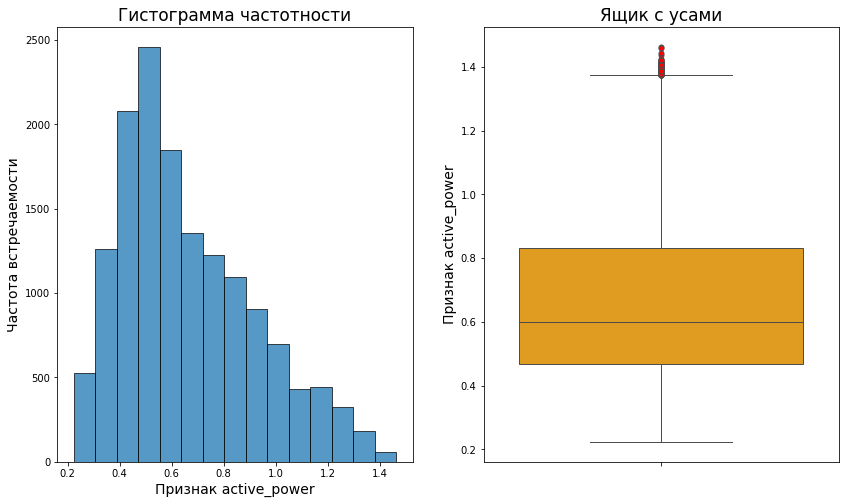


Статистические характеристики признака reactive_power


count    14876.000000
mean         0.438986
std          5.873485
min       -715.479924
25%          0.337175
50%          0.441639
75%          0.608201
max          1.270284
Name: reactive_power, dtype: float64

Мода признака reactive_power: 0.257418



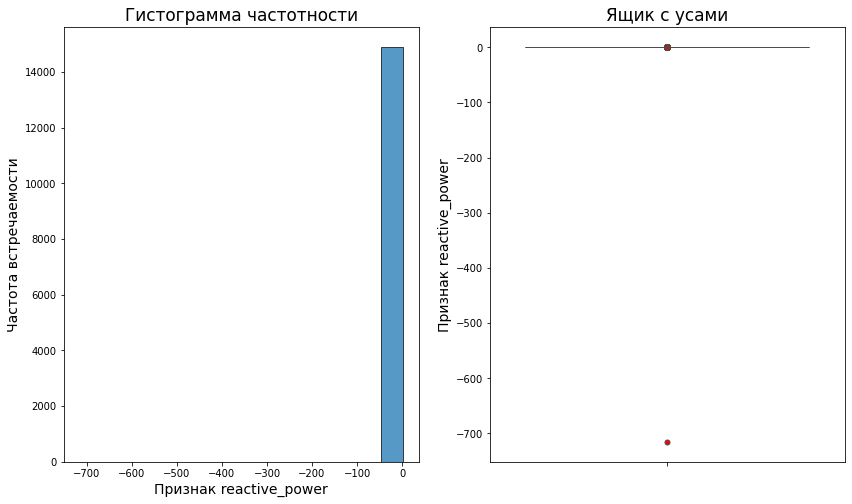


Статистические характеристики признака delta_time


count    14876.000000
mean       171.670946
std         98.186803
min         11.000000
25%        107.000000
50%        147.000000
75%        214.000000
max        907.000000
Name: delta_time, dtype: float64

Мода признака delta_time: 126.00000000000001



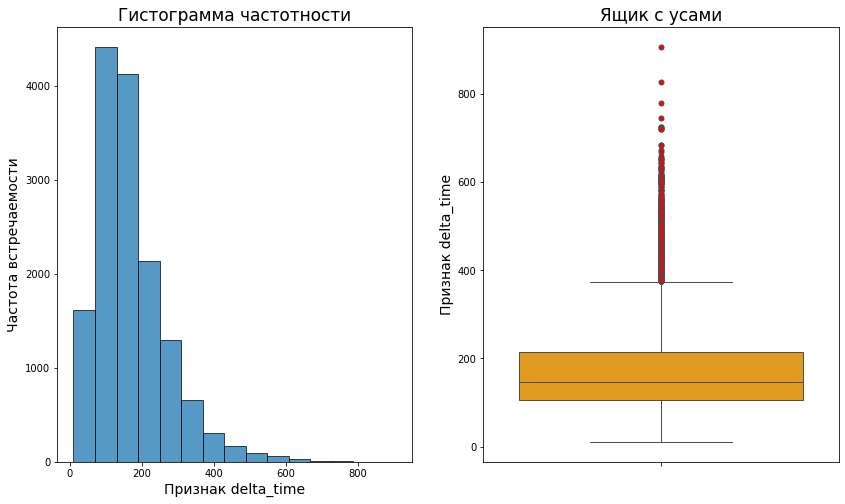

In [22]:
analysis_num(df1, 15)

> В данных reactive_power - есть отрицательные значения, их нужно удалить


Статистические характеристики признака active_power


count    14875.000000
mean         0.662749
std          0.258894
min          0.223120
25%          0.467115
50%          0.599578
75%          0.830135
max          1.463773
Name: active_power, dtype: float64

Мода признака active_power: 0.509728



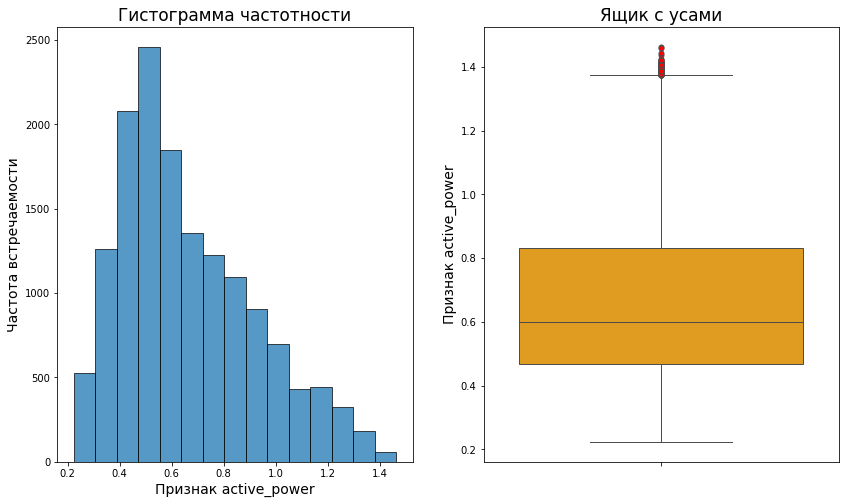


Статистические характеристики признака reactive_power


count    14875.000000
mean         0.487115
std          0.197612
min          0.153777
25%          0.337190
50%          0.441665
75%          0.608223
max          1.270284
Name: reactive_power, dtype: float64

Мода признака reactive_power: 0.257418



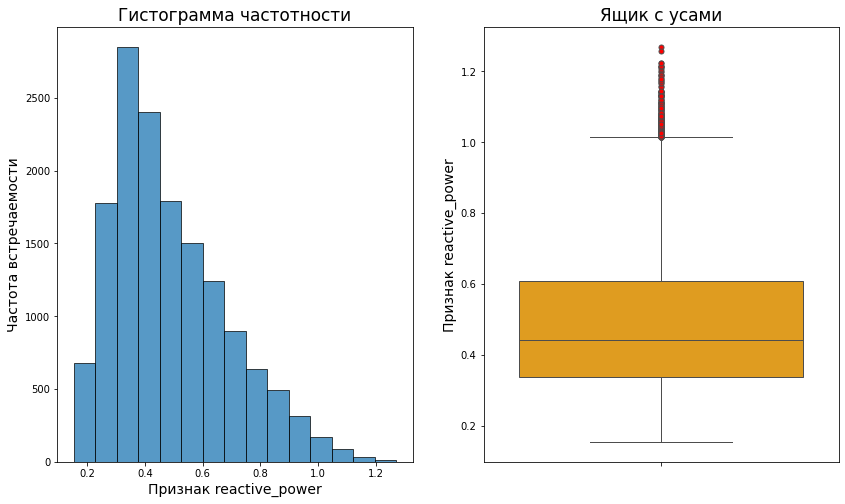


Статистические характеристики признака delta_time


count    14875.000000
mean       171.675160
std         98.188759
min         11.000000
25%        107.000000
50%        147.000000
75%        214.000000
max        907.000000
Name: delta_time, dtype: float64

Мода признака delta_time: 126.00000000000001



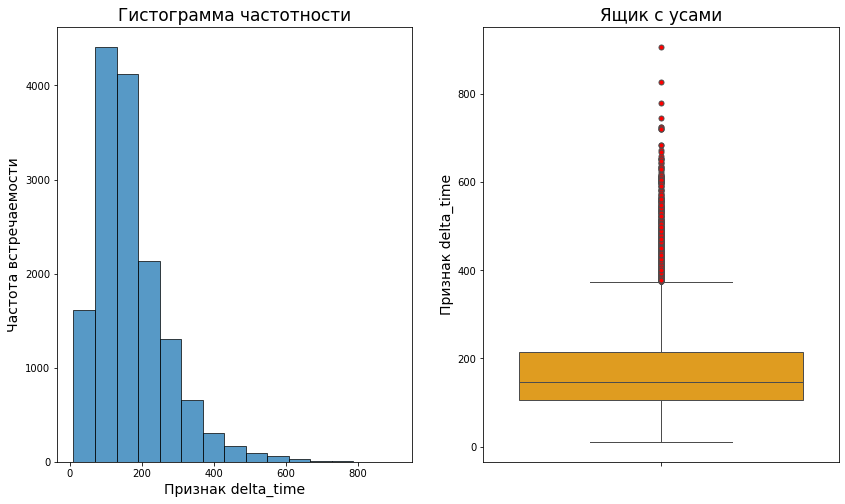

In [23]:
# Срежем отрицательные знаечния:
df1 = df1.query('reactive_power > 0')

# Снова построим графики:
analysis_num(df1, 15)

- признак ***active_power*** - лежит в допустимом диапозоне. Распределение несимметричное, со смещением влево
- признак ***reactive_power*** - лежит в допустимом диапозоне. Распределение несимметричное, со смещением влево
- признак ***delta_time*** - лежит в допустимом диапозоне. Распределение несимметричное, со смещением влево

У всех признаков присутствуют выбросы, удалять их не будем, т.к. уже обусловились, что это нормальные диапозоны для этих данных

<a id='section_8'></a>

### Анализ df2 (Данные об объеме подачи сыпучих материалов)


Статистические характеристики признака bulk_1


count    252.000000
mean      39.242063
std       18.277654
min       10.000000
25%       27.000000
50%       31.000000
75%       46.000000
max      185.000000
Name: bulk_1, dtype: float64

Мода признака bulk_1: 27.0



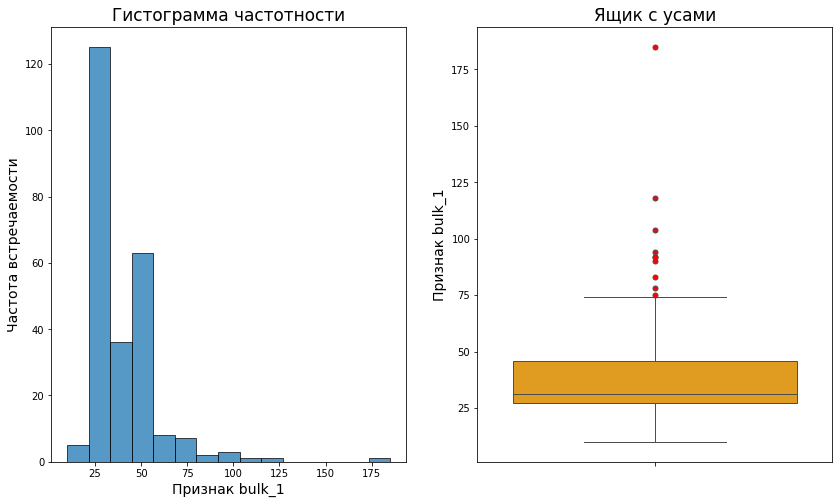


Статистические характеристики признака bulk_2


count     22.000000
mean     253.045455
std       21.180578
min      228.000000
25%      242.000000
50%      251.500000
75%      257.750000
max      325.000000
Name: bulk_2, dtype: float64

Мода признака bulk_2: 254.0



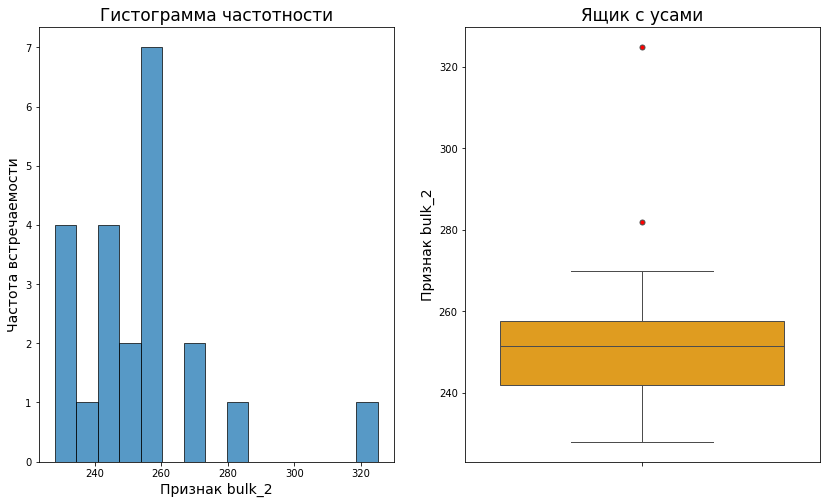


Статистические характеристики признака bulk_3


count    1298.000000
mean      113.879045
std        75.483494
min         6.000000
25%        58.000000
50%        97.500000
75%       152.000000
max       454.000000
Name: bulk_3, dtype: float64

Мода признака bulk_3: 21.0



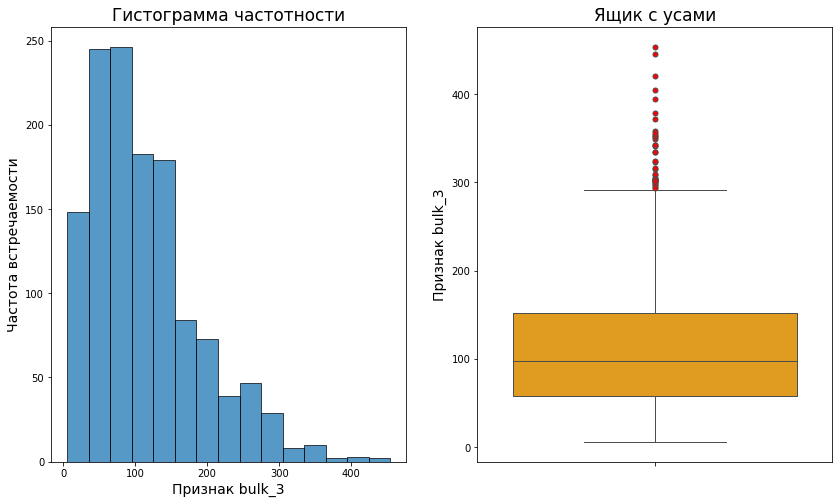


Статистические характеристики признака bulk_4


count    1014.000000
mean      104.394477
std        48.184126
min        12.000000
25%        72.000000
50%       102.000000
75%       133.000000
max       281.000000
Name: bulk_4, dtype: float64

Мода признака bulk_4: 88.0



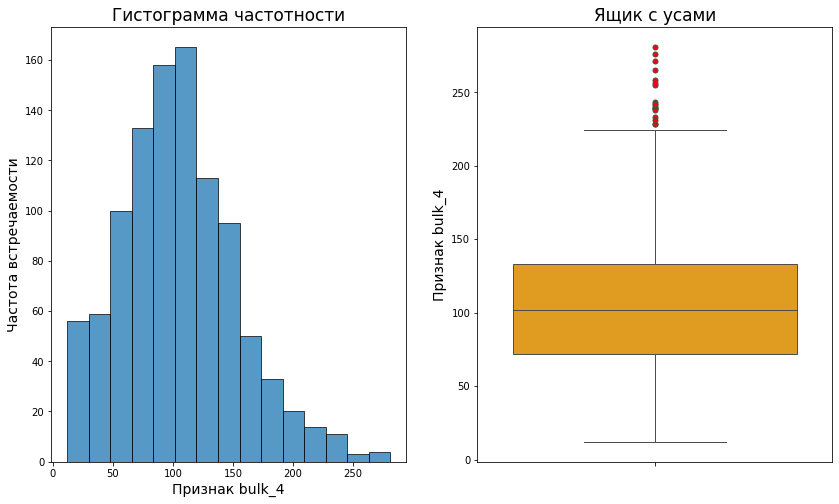


Статистические характеристики признака bulk_5


count     77.000000
mean     107.025974
std       81.790646
min       11.000000
25%       70.000000
50%       86.000000
75%      132.000000
max      603.000000
Name: bulk_5, dtype: float64

Мода признака bulk_5: 74.0



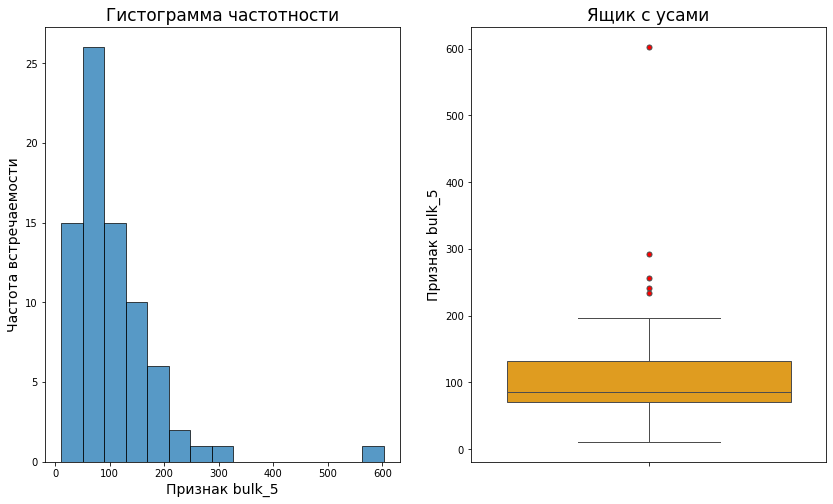


Статистические характеристики признака bulk_6


count    576.000000
mean     118.925347
std       72.057776
min       17.000000
25%       69.750000
50%      100.000000
75%      157.000000
max      503.000000
Name: bulk_6, dtype: float64

Мода признака bulk_6: 76.0



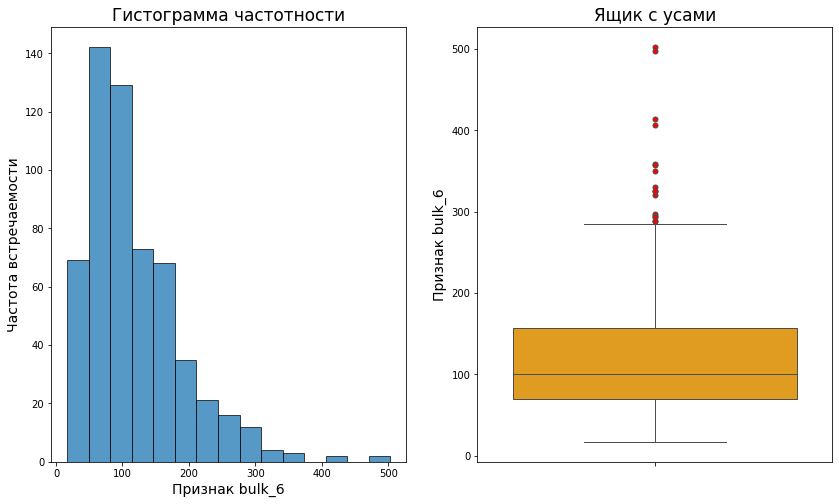


Статистические характеристики признака bulk_7


count     25.000000
mean     305.600000
std      191.022904
min       47.000000
25%      155.000000
50%      298.000000
75%      406.000000
max      772.000000
Name: bulk_7, dtype: float64

Мода признака bulk_7: 47.0



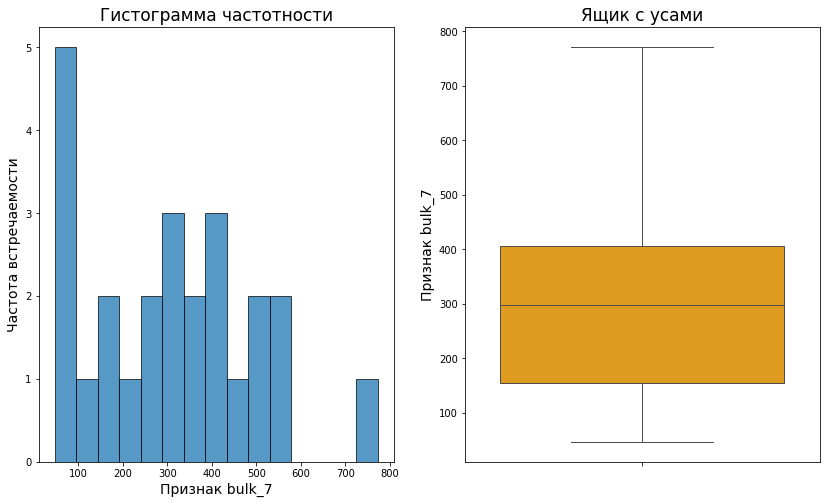


Статистические характеристики признака bulk_8


count     1.0
mean     49.0
std       NaN
min      49.0
25%      49.0
50%      49.0
75%      49.0
max      49.0
Name: bulk_8, dtype: float64

Мода признака bulk_8: 49.0



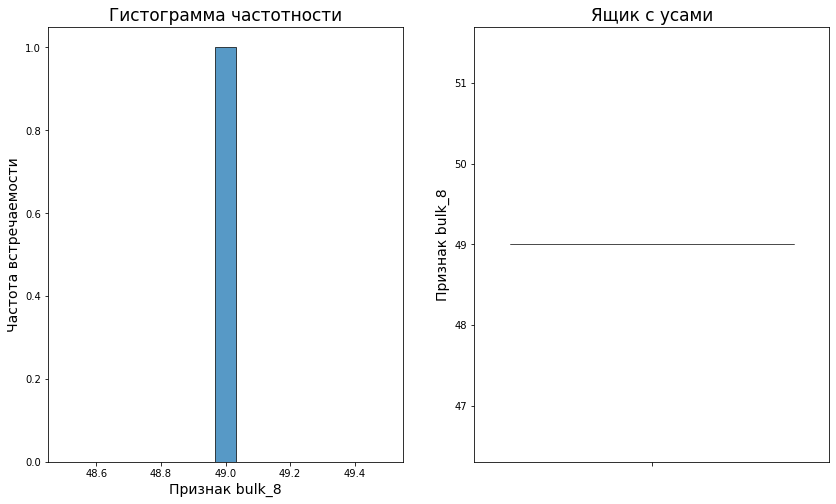


Статистические характеристики признака bulk_9


count     19.000000
mean      76.315789
std       21.720581
min       63.000000
25%       66.000000
50%       68.000000
75%       70.500000
max      147.000000
Name: bulk_9, dtype: float64

Мода признака bulk_9: 66.0



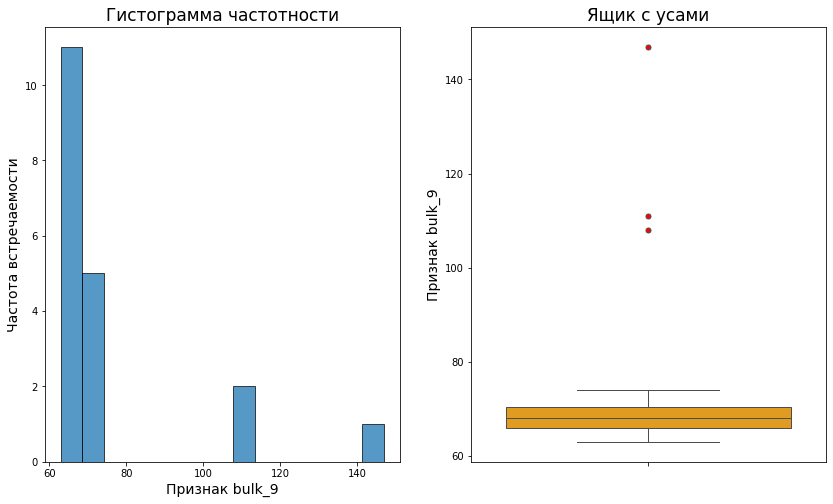


Статистические характеристики признака bulk_10


count    176.000000
mean      83.284091
std       26.060347
min       24.000000
25%       64.000000
50%       86.500000
75%      102.000000
max      159.000000
Name: bulk_10, dtype: float64

Мода признака bulk_10: 105.0



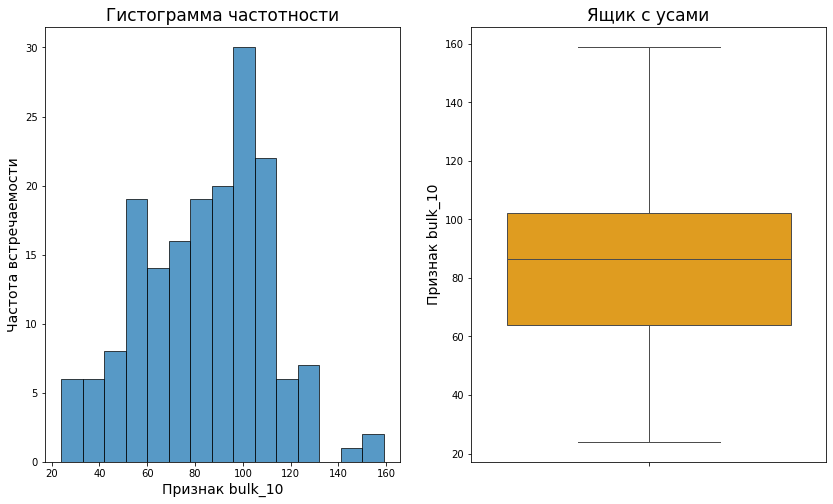


Статистические характеристики признака bulk_11


count    177.000000
mean      76.819209
std       59.655365
min        8.000000
25%       25.000000
50%       64.000000
75%      106.000000
max      313.000000
Name: bulk_11, dtype: float64

Мода признака bulk_11: 18.0



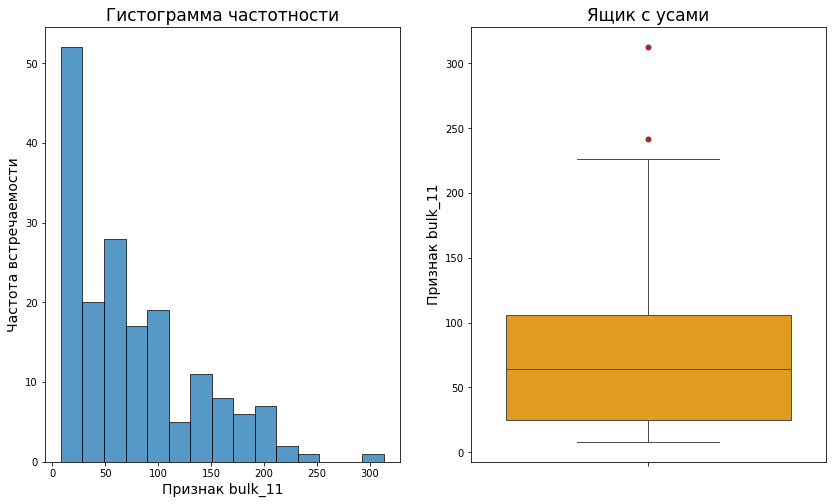


Статистические характеристики признака bulk_12


count    2450.000000
mean      260.471020
std       120.649269
min        53.000000
25%       204.000000
50%       208.000000
75%       316.000000
max      1849.000000
Name: bulk_12, dtype: float64

Мода признака bulk_12: 206.0



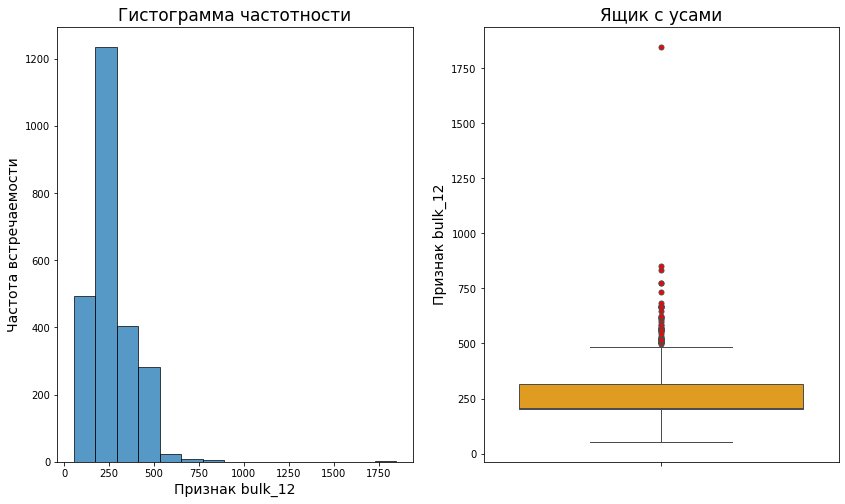


Статистические характеристики признака bulk_13


count     18.000000
mean     181.111111
std       46.088009
min      151.000000
25%      153.250000
50%      155.500000
75%      203.500000
max      305.000000
Name: bulk_13, dtype: float64

Мода признака bulk_13: 153.0



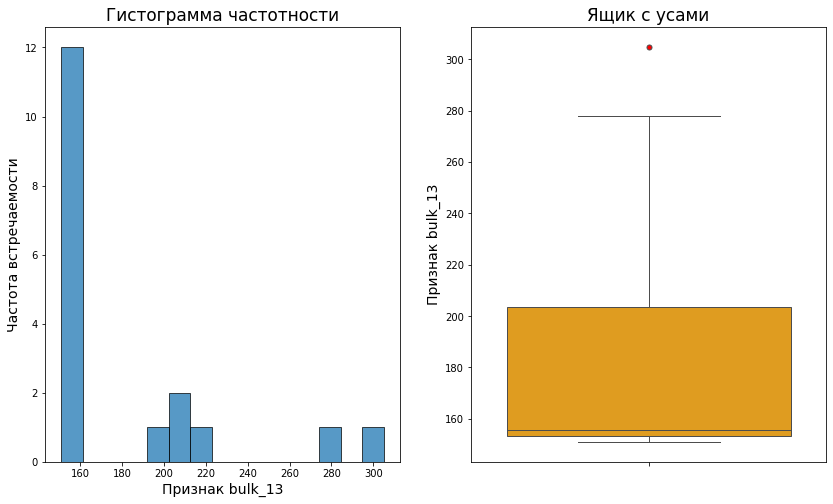


Статистические характеристики признака bulk_14


count    2806.000000
mean      170.284747
std        65.868652
min        16.000000
25%       119.000000
50%       151.000000
75%       205.750000
max       636.000000
Name: bulk_14, dtype: float64

Мода признака bulk_14: 102.0



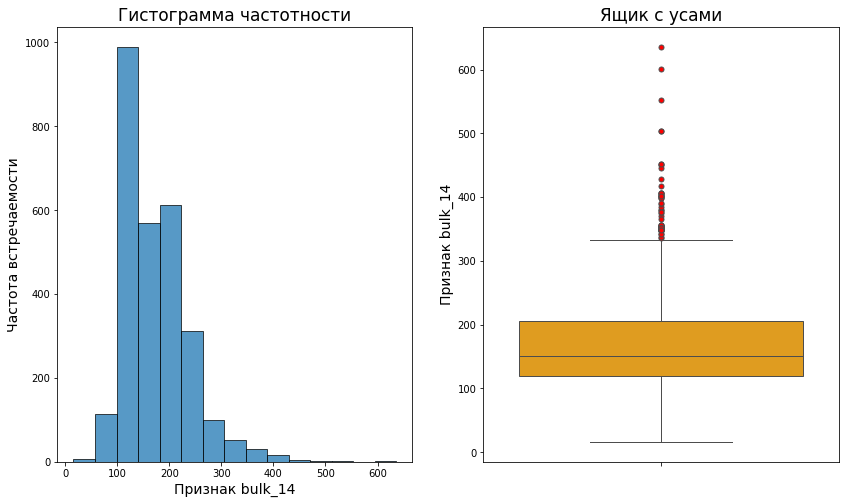


Статистические характеристики признака bulk_15


count    2248.000000
mean      160.513345
std        51.765319
min         1.000000
25%       105.000000
50%       160.000000
75%       205.000000
max       405.000000
Name: bulk_15, dtype: float64

Мода признака bulk_15: 104.0



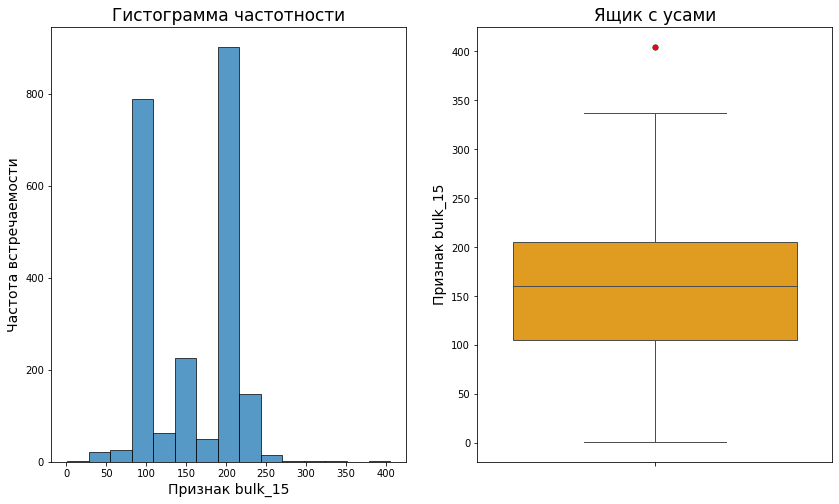

In [24]:
analysis_num(df2, 15)

> Все значения лежат в допустимом диапозоне (сверх уникальных или огромных значений нет)

> Большенство признаков имеют сравнимо низкое количество выбросов

> Распределения почти во всех случаях несимметричные (заметна тенденция смещения влево)

> признак bulk_8 - это одно наблюдение

В данном датафрейме много пропусков и все данные без них лежат в нормальном диапозоне, поэтому оставим их пока что как есть.

Анализ датафрейма с данными о времени подачи сыпучих материалов - не нужен, т.к. имеет bulk признаки такие же как и датафрейм с данными о объеме подачи сыпучих материалов

<a id='section_9'></a>

### Анализ df4 (Данные о продувке сплава газом)


Статистические характеристики признака gas_1


count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: gas_1, dtype: float64

Мода признака gas_1: 0.0083985291



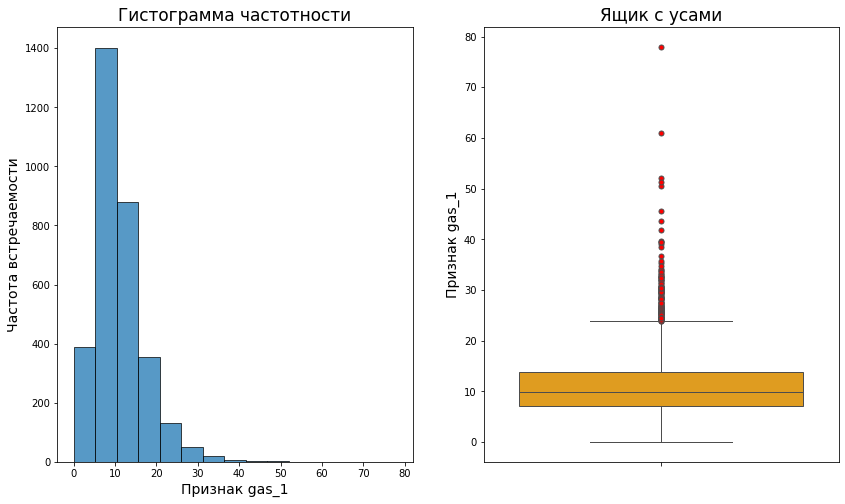

In [25]:
analysis_num(df4, 15)

> ***df4*** - имеет всего один признак, этот признак лежит в допустимом диапозоне, имеются выбросы, распределение несимметричное со смещением влево

<a id='section_10'></a>

### Анализ df5 (Данные о измерениях температуры)


Статистические характеристики признака temperature


count    14665.000000
mean      1590.722741
std         20.394381
min       1191.000000
25%       1580.000000
50%       1590.000000
75%       1599.000000
max       1705.000000
Name: temperature, dtype: float64

Мода признака temperature: 1593.0



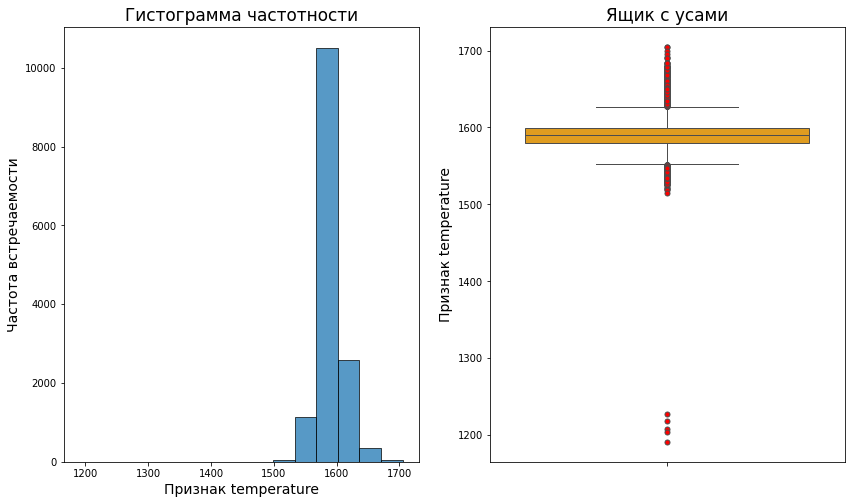

In [26]:
analysis_num(df5, 15)

- По соглашению с заказчиком было решено удалить все наблюдения, где температура ниже 1400 градусов

- Также просмотрим количество замеров, если есть начало замера, должен быть и конец (второй замер). Если количество замеров равно 1 для определеного ключа - значит такие значения нужно удалить

In [27]:
df5_group = df5.groupby('key').count()

df5_group.sort_values(by='temperature').head()

,measurement_time,temperature
key,,
3241,6,1
2906,7,1
2905,7,1
2904,5,1
2903,4,1


Группировка показала, что есть такие партии, в которых проводился всего 1 замер температуры - их нужно исключить

In [28]:
df5_begin = df5.shape

# Значения, которые нужно исключить
key1 = df5[df5['temperature'] < 1400]['key']
key2 = df5_group[df5_group['temperature'] < 2].index

# Исключаем значения
df5 = df5[~df5['key'].isin(key1) & ~df5['key'].isin(key2)]

df5_end = df5.shape

# shape до/после удаления
print(f'Размер df5 до удаления данных: {df5_begin}')
print(f'Размер df5 после удаления данных: {df5_end}')

Размер df5 до удаления данных: (18092, 3)
Размер df5 после удаления данных: (13903, 3)


Снова вызовем функцию для построения графиков и статистик и посмотрим на изменения:


Статистические характеристики признака temperature


count    13903.000000
mean      1590.924549
std         18.751262
min       1519.000000
25%       1580.000000
50%       1590.000000
75%       1599.000000
max       1705.000000
Name: temperature, dtype: float64

Мода признака temperature: 1591.0



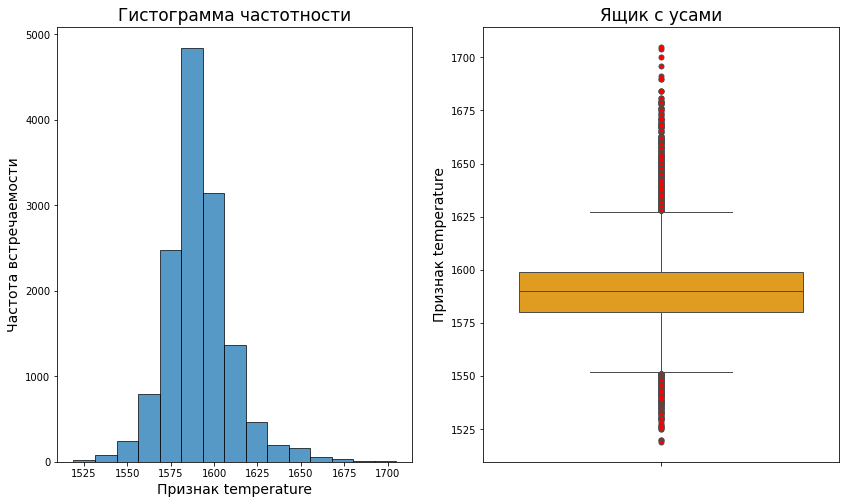

In [29]:
analysis_num(df5, 15)

> Одно из немногих распределений схоже с нормальным

> Выбросов достаточно большое количество

> Данные лежат в допустимом диапозоне

<a id='section_11'></a>

### Анализ df6 (Данные об объеме подачи проволочных материалов)


Статистические характеристики признака wire_1


count    3055.000000
mean      100.895853
std        42.012518
min         1.918800
25%        72.115684
50%       100.158234
75%       126.060483
max       330.314424
Name: wire_1, dtype: float64

Мода признака wire_1: 105.0504



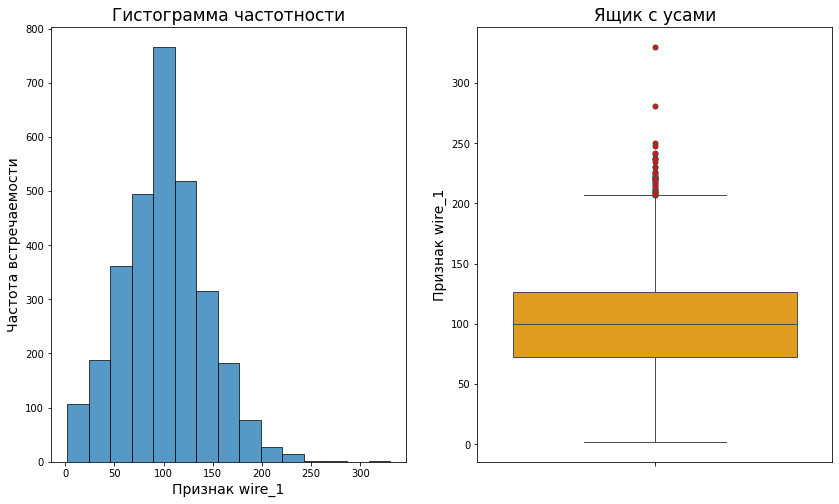


Статистические характеристики признака wire_2


count    1079.000000
mean       50.577323
std        39.320216
min         0.030160
25%        20.193680
50%        40.142956
75%        70.227558
max       282.780152
Name: wire_2, dtype: float64

Мода признака wire_2: 30.09968



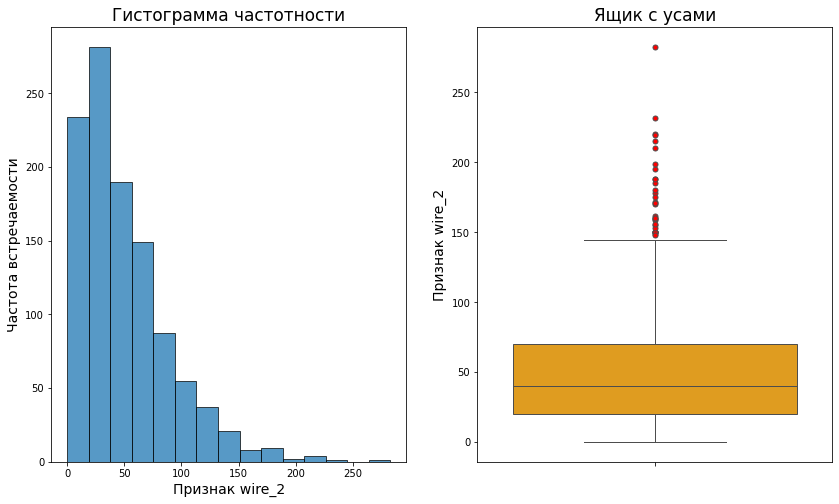


Статистические характеристики признака wire_3


count     63.000000
mean     189.482681
std       99.513444
min        0.144144
25%       95.135044
50%      235.194977
75%      276.252014
max      385.008668
Name: wire_3, dtype: float64

Мода признака wire_3: 0.144144



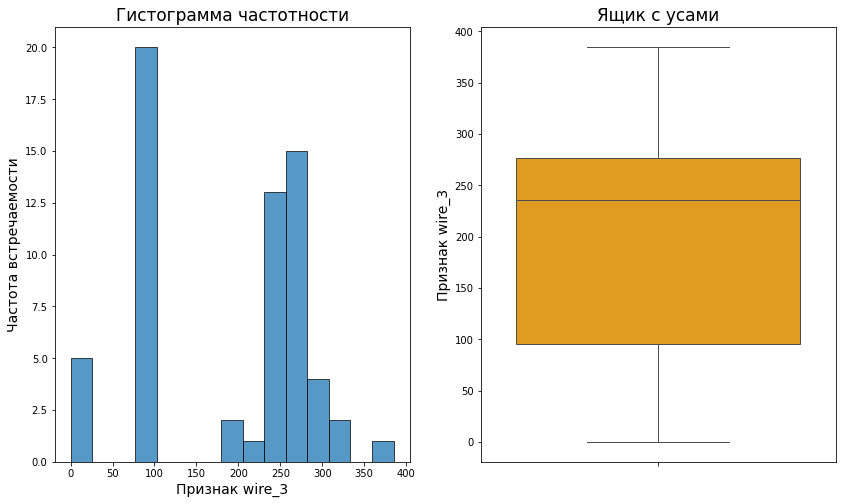


Статистические характеристики признака wire_4


count     14.000000
mean      57.442841
std       28.824667
min       24.148801
25%       40.807002
50%       45.234282
75%       76.124619
max      113.231044
Name: wire_4, dtype: float64

Мода признака wire_4: 24.148801



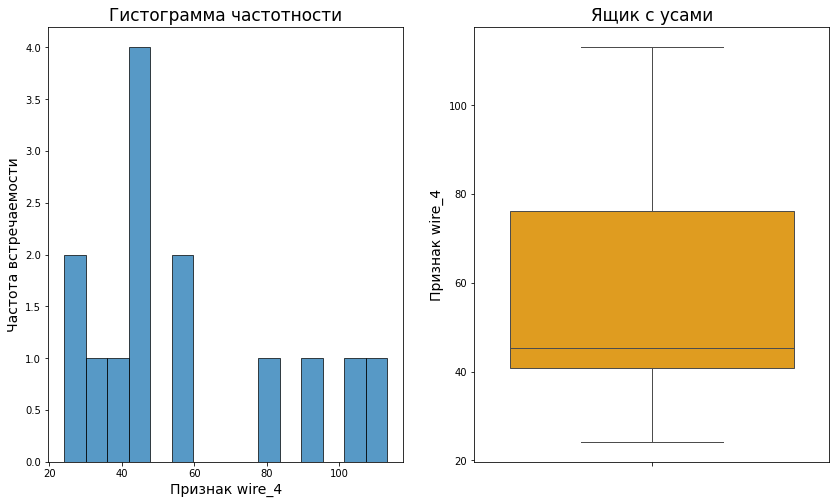


Статистические характеристики признака wire_5


count     1.000
mean     15.132
std         NaN
min      15.132
25%      15.132
50%      15.132
75%      15.132
max      15.132
Name: wire_5, dtype: float64

Мода признака wire_5: 15.132



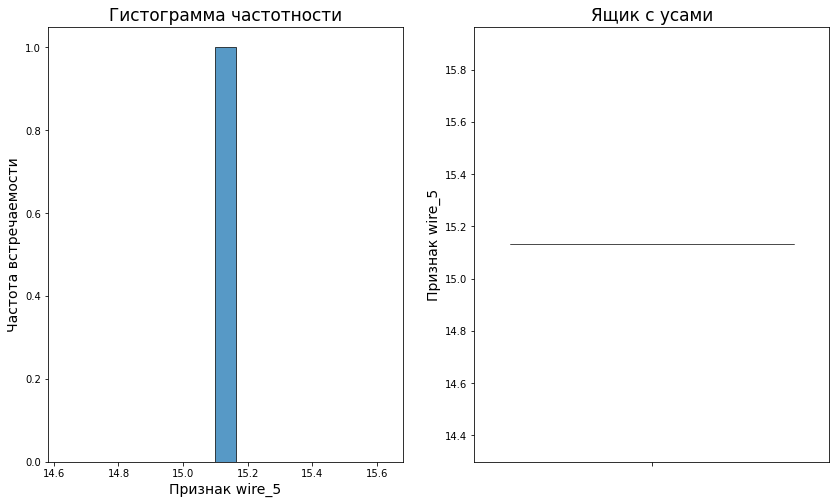


Статистические характеристики признака wire_6


count     73.000000
mean      48.016974
std       33.919845
min        0.034320
25%       25.053600
50%       42.076324
75%       64.212723
max      180.454575
Name: wire_6, dtype: float64

Мода признака wire_6: 18.086641



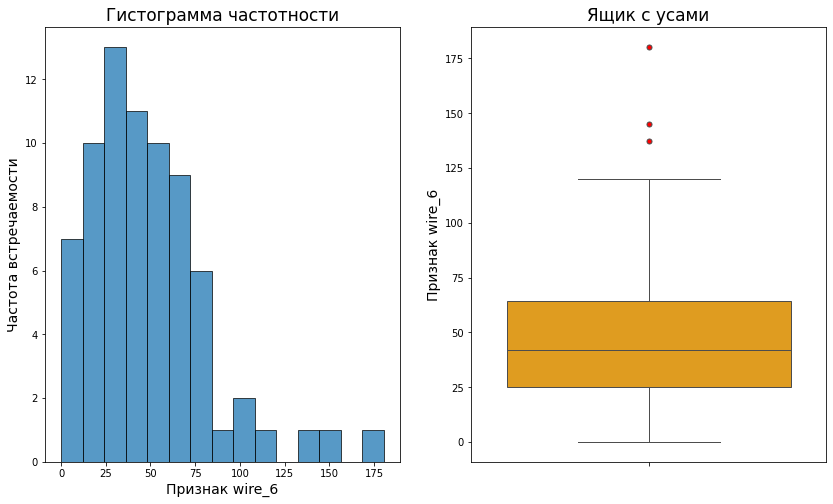


Статистические характеристики признака wire_7


count    11.000000
mean     10.039007
std       8.610584
min       0.234208
25%       6.762756
50%       9.017009
75%      11.886057
max      32.847674
Name: wire_7, dtype: float64

Мода признака wire_7: 12.354473



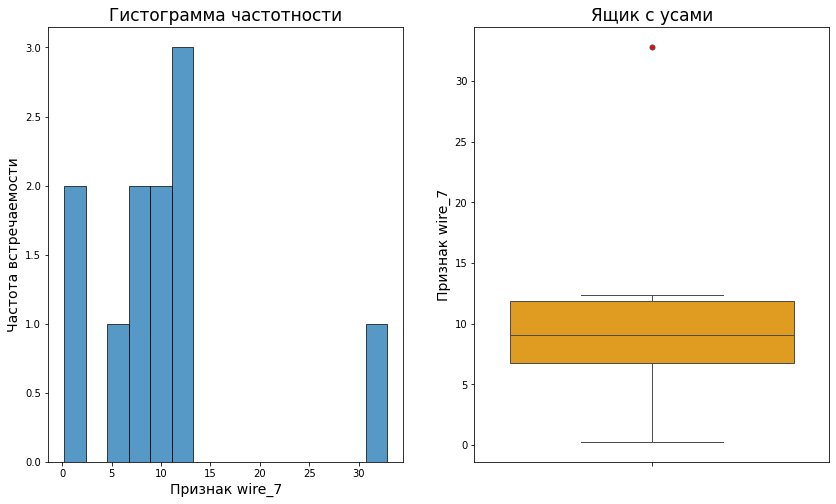


Статистические характеристики признака wire_8


count     19.000000
mean      53.625193
std       16.881728
min       45.076721
25%       46.094879
50%       46.279999
75%       48.089603
max      102.762401
Name: wire_8, dtype: float64

Мода признака wire_8: 46.187439000000005



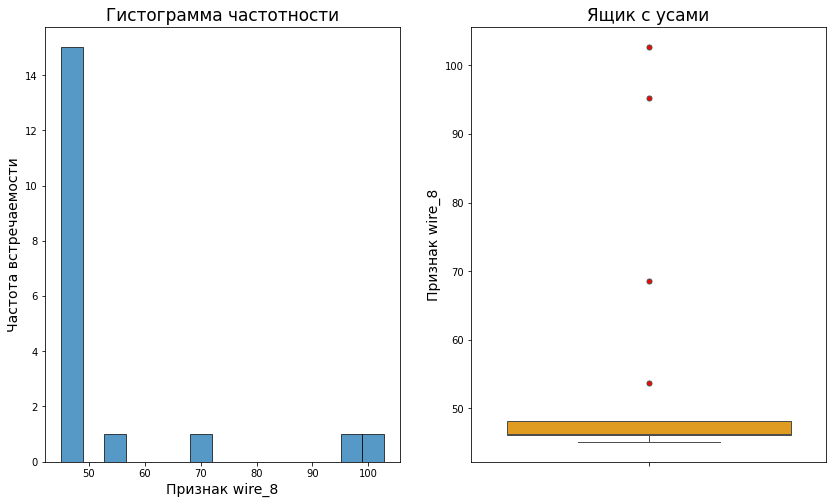


Статистические характеристики признака wire_9


count    29.000000
mean     34.155752
std      19.931616
min       4.622800
25%      22.058401
50%      30.066399
75%      43.862003
max      90.053604
Name: wire_9, dtype: float64

Мода признака wire_9: 30.066399



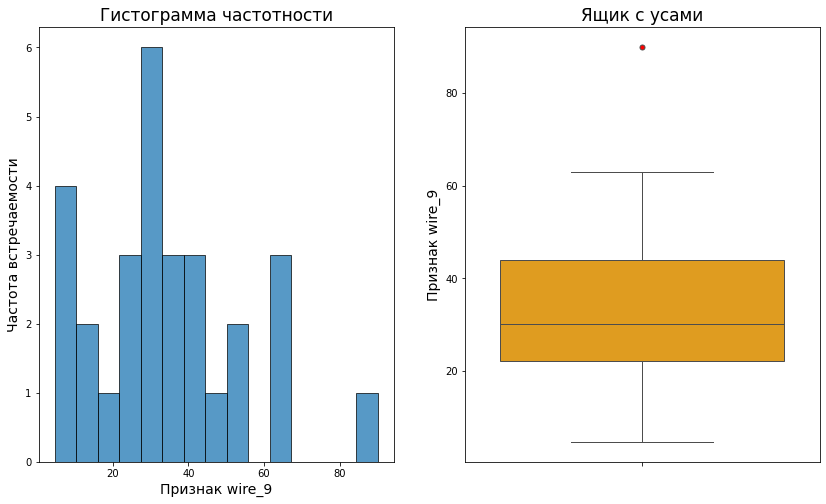

In [30]:
analysis_num(df6, 15)

> Все значения лежат в допустимом диапозоне (сверх уникальных или огромных значений нет)

> Выбросы имеются, но их очень мало

> Распределения почти во всех случаях несимметричные (заметна тенденция смещения влево)

> признак **wire_5** - одно наблюдение

Данные нормальные, оставляем как есть

<a id='section_12'></a>

### Вывод 

- Признаки всех датафреймов лежат в допустимых диапозонах

- Тенденция нессиметричного распледеления со смещением влево наблюдается почти во всех признаках всех датафреймов

- В некоторых датафреймах очень большое количество пропусков

- Выбросы есть, но их сравнимо мало

- Аномальных значений - нет

С заказчиком было обусловленно удалить наблюдения с температурой ниже 1400 градусов. Также была произведенна группировка по ключам для замеров температуры, если у партии количество замеров было равно 1 - такие значения были удалены, т.к. если есть начало замера - должен быть и конец, и, соответвенно, наоборот.

В общей целостности данные были просморенны и немного подкорректированны. Данные подготовлены к этапу объединения

## Объединение данных

<a id='section_13'></a>

### Подготовка и группировка df1

In [31]:
df1.head()

,key,start_heating,end_heating,active_power,reactive_power,delta_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148.0


- как видно, в датафрейме у нас представлена информация не по каждой партии, а по каждой итерации нагрева партий, поэтому агрегирование необходимо делать по key, агрегирующую функцию будем использовать - суммирование

- перед тем как агрегрировать таблицу, добавим два новых признака:

1. Мощность - (корень из суммы квадратов признаков активной и реактивной мощности)

2. Работа - (мощность умноженная на время)

In [32]:
df1['power'] = (df1['active_power']**2 + df1['reactive_power']**2)**0.5
df1['energy'] = df1['power'] * df1['delta_time']

#Датафрейм принял вид:
df1.head()

,key,start_heating,end_heating,active_power,reactive_power,delta_time,power,energy
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228.0,0.371123,84.616003
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185.0,0.902319,166.928978
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172.0,0.722536,124.276277
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365.0,0.642824,234.630603
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148.0,1.079934,159.830252


In [33]:
#Сводная таблица (агрегирование - суммирование):
df1_grouped = df1.pivot_table(index='key', values=['active_power', 'reactive_power', 
                                               'power', 'energy', 'delta_time'], aggfunc='sum')

#Новые имена столбцов:
df1_grouped.columns = ['total_active_power', 'total_delta_time', 'total_energy', 'total_power', 'total_reactive_power']

#Перезапишем индексы:
df1_grouped = df1_grouped.reset_index()

#Выведем обновленный дф:
df1_grouped.head()

,key,total_active_power,total_delta_time,total_energy,total_power,total_reactive_power
0,1,3.036730,1098.0,770.282114,3.718736,2.142821
1,2,2.139408,811.0,481.760005,2.588349,1.453357
2,3,4.063641,655.0,722.837668,5.019223,2.937457
3,4,2.706489,741.0,683.455597,3.400038,2.056992
4,5,2.252950,869.0,512.169934,2.816980,1.687991


<a id='section_14'></a>

### Подготовка и группировка df2

In [34]:
df2.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   252 non-null    float64
 2   bulk_2   22 non-null     float64
 3   bulk_3   1298 non-null   float64
 4   bulk_4   1014 non-null   float64
 5   bulk_5   77 non-null     float64
 6   bulk_6   576 non-null    float64
 7   bulk_7   25 non-null     float64
 8   bulk_8   1 non-null      float64
 9   bulk_9   19 non-null     float64
 10  bulk_10  176 non-null    float64
 11  bulk_11  177 non-null    float64
 12  bulk_12  2450 non-null   float64
 13  bulk_13  18 non-null     float64
 14  bulk_14  2806 non-null   float64
 15  bulk_15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [36]:
#Просмотрим пропуска:
df2.isna().sum()

key           0
bulk_1     2877
bulk_2     3107
bulk_3     1831
bulk_4     2115
bulk_5     3052
bulk_6     2553
bulk_7     3104
bulk_8     3128
bulk_9     3110
bulk_10    2953
bulk_11    2952
bulk_12     679
bulk_13    3111
bulk_14     323
bulk_15     881
dtype: int64

- Всего в датафрейме 3129 значений, удалим все признаки, в которых пропусков более **80%**

- В остальных признаках, пропуска заменим **на нули**

In [37]:
df2_grouped = df2.drop(columns=['bulk_1', 'bulk_2', 'bulk_5', 'bulk_6', 'bulk_7', 
                    'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_13'])

df2_grouped = df2_grouped.fillna(0)

<a id='section_15'></a>

### Подготовка и группировка df5

In [38]:
df5.head()

,key,measurement_time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [39]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 0 to 13925
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               13903 non-null  int64         
 1   measurement_time  13903 non-null  datetime64[ns]
 2   temperature       13903 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 434.5 KB


- Сгруппируем дф по ключу, введем новые признаки - результаты первого и последнего замера температуры в партии:

In [40]:
#Сортируем по ключам и по времени:
df5 = df5.sort_values(by=['key', 'measurement_time'])

#Группируем по ключу:
df5_grouped = df5.pivot_table(index='key', values=['temperature', 'measurement_time'], aggfunc=['first', 'last'])
df5_grouped.columns = ['first_time_temp', 'first_temp', 'last_time_temp', 'last_temp']

#Новые имена столбцов:
df5_grouped = df5_grouped.reset_index()

#Создаем новый временной признак:
df5_grouped['delta_time_temp'] = (df5_grouped['last_time_temp'] - df5_grouped['first_time_temp']).dt.total_seconds()

#Удаляем излишние признаки:
df5_grouped = df5_grouped.drop(columns=['first_time_temp', 'last_time_temp'])

#Выводим результирующий дф:
df5_grouped.head()

,key,first_temp,last_temp,delta_time_temp
0,1,1571.0,1613.0,1714.0
1,2,1581.0,1602.0,1265.0
2,3,1596.0,1599.0,1753.0
3,4,1601.0,1625.0,1220.0
4,5,1576.0,1602.0,1536.0


<a id='section_16'></a>

### Подготовка и группировка df6

In [41]:
df6.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3055 non-null   float64
 2   wire_2  1079 non-null   float64
 3   wire_3  63 non-null     float64
 4   wire_4  14 non-null     float64
 5   wire_5  1 non-null      float64
 6   wire_6  73 non-null     float64
 7   wire_7  11 non-null     float64
 8   wire_8  19 non-null     float64
 9   wire_9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


- удаляем признаки в которых более 80% - пропуска

- в остальных заменяем пропуска на нули

In [43]:
df6_grouped = df6.drop(columns=['wire_3', 'wire_4', 'wire_5', 'wire_6', 'wire_7', 
                    'wire_8', 'wire_9'])

df6_grouped = df6_grouped.fillna(0)

df6_grouped.head()

,key,wire_1,wire_2
0,1,60.059998,0.00000
1,2,96.052315,0.00000
2,3,91.160157,0.00000
3,4,89.063515,0.00000
4,5,89.238236,9.11456


<a id='section_17'></a>

### Объединение данных в итоговый датафрейм

In [44]:
#Объединяем датафреймы:
df_itog = pd.merge(df1_grouped, df2_grouped, on='key')
df_itog = pd.merge(df_itog, df4, on='key')
df_itog = pd.merge(df_itog, df5_grouped, on='key')
df_itog = pd.merge(df_itog, df6_grouped, on='key')

#Удаляем ключ (бесполезный признак):
df_itog = df_itog.drop(columns=['key'])

#Выводим итоговый датафрейм:
df_itog.head(10)

,total_active_power,total_delta_time,total_energy,total_power,total_reactive_power,bulk_3,bulk_4,bulk_12,bulk_14,bulk_15,gas_1,first_temp,last_temp,delta_time_temp,wire_1,wire_2
0,3.036730,1098.0,770.282114,3.718736,2.142821,0.0,43.0,206.0,150.0,154.0,29.749986,1571.0,1613.0,1714.0,60.059998,0.000000
1,2.139408,811.0,481.760005,2.588349,1.453357,0.0,73.0,206.0,149.0,154.0,12.555561,1581.0,1602.0,1265.0,96.052315,0.000000
2,4.063641,655.0,722.837668,5.019223,2.937457,0.0,34.0,205.0,152.0,153.0,28.554793,1596.0,1599.0,1753.0,91.160157,0.000000
3,2.706489,741.0,683.455597,3.400038,2.056992,0.0,81.0,207.0,153.0,154.0,18.841219,1601.0,1625.0,1220.0,89.063515,0.000000
4,2.252950,869.0,512.169934,2.816980,1.687991,0.0,78.0,203.0,151.0,152.0,5.413692,1576.0,1602.0,1536.0,89.238236,9.114560
5,2.725274,952.0,839.231310,3.313074,1.881313,0.0,117.0,204.0,201.0,154.0,11.273392,1543.0,1596.0,1497.0,99.109917,9.114560
6,2.626877,673.0,613.576982,3.283913,1.960419,0.0,117.0,204.0,152.0,154.0,9.836267,1586.0,1599.0,1744.0,98.061600,0.000000
7,2.678958,913.0,619.129542,3.405956,2.096952,0.0,99.0,410.0,252.0,153.0,15.171553,1577.0,1598.0,1615.0,155.282394,0.000000
8,3.520820,625.0,570.113675,4.335261,2.527365,0.0,117.0,107.0,99.0,203.0,8.216623,1587.0,1592.0,1811.0,113.393279,9.143681
9,3.118778,825.0,533.482050,3.791005,2.154941,0.0,0.0,203.0,102.0,204.0,6.529891,1574.0,1593.0,1551.0,81.244796,12.376000


In [45]:
df_itog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2324
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_active_power    2325 non-null   float64
 1   total_delta_time      2325 non-null   float64
 2   total_energy          2325 non-null   float64
 3   total_power           2325 non-null   float64
 4   total_reactive_power  2325 non-null   float64
 5   bulk_3                2325 non-null   float64
 6   bulk_4                2325 non-null   float64
 7   bulk_12               2325 non-null   float64
 8   bulk_14               2325 non-null   float64
 9   bulk_15               2325 non-null   float64
 10  gas_1                 2325 non-null   float64
 11  first_temp            2325 non-null   float64
 12  last_temp             2325 non-null   float64
 13  delta_time_temp       2325 non-null   float64
 14  wire_1                2325 non-null   float64
 15  wire_2               

In [46]:
df_itog.shape

(2325, 16)

<a id='section_18'></a>

### Вывод

Каждый датафрейм был подготовлен и агрегирован (если это требовалось) к итоговому объединению, в результате данного объединения мы получили датафрейм размером **2325x16**. В итоговом датафрейме нет пропусков, добавлены новые признаки:

- ***total_active_power*** - агрегированная активная мощность

- ***total_delta_time*** - агрегированный временной интервал замеров 

- ***total_energy***  - агрегированная работа         

- ***total_reactive_power*** - агрегированная реактивная мощность

- ***first_temp*** - первая измеренная температура

- ***last_temp*** - последняя измеренная температура

- ***delta_time_temp*** - временной интервал между первым и последним замером температуры

Итоговые данные хорошо скомпанованы и готовы к исследовательсому анализу

## Исследовательский анализ и предобработка данных объединённого датафрейма

<a id='section_19'></a>

### Графический и статистический анализ итогового датафрейма


Статистические характеристики признака total_delta_time


count    2325.000000
mean      807.988387
std       340.888430
min        57.000000
25%       581.000000
50%       778.000000
75%       993.000000
max      4189.000000
Name: total_delta_time, dtype: float64

Мода признака total_delta_time: 519.0



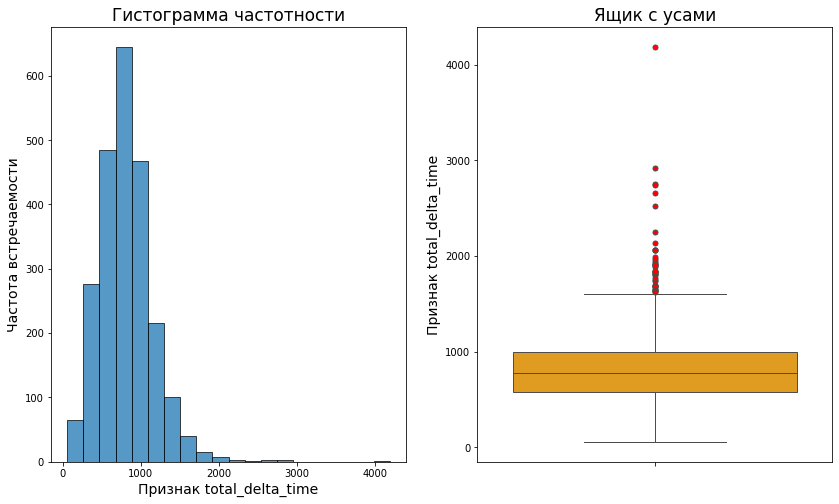


Статистические характеристики признака total_energy


count    2325.000000
mean      670.060566
std       319.565380
min        33.430208
25%       457.872635
50%       630.913482
75%       841.644330
max      4546.405812
Name: total_energy, dtype: float64

Мода признака total_energy: 33.43020759374457



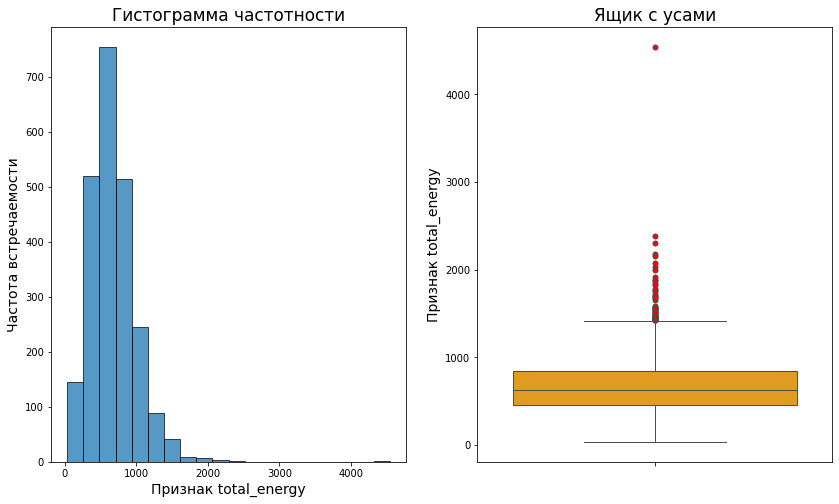


Статистические характеристики признака total_power


count    2325.000000
mean        3.885528
std         1.517546
min         0.331897
25%         2.844193
50%         3.769823
75%         4.769421
max        15.288271
Name: total_power, dtype: float64

Мода признака total_power: 0.3318973771514322



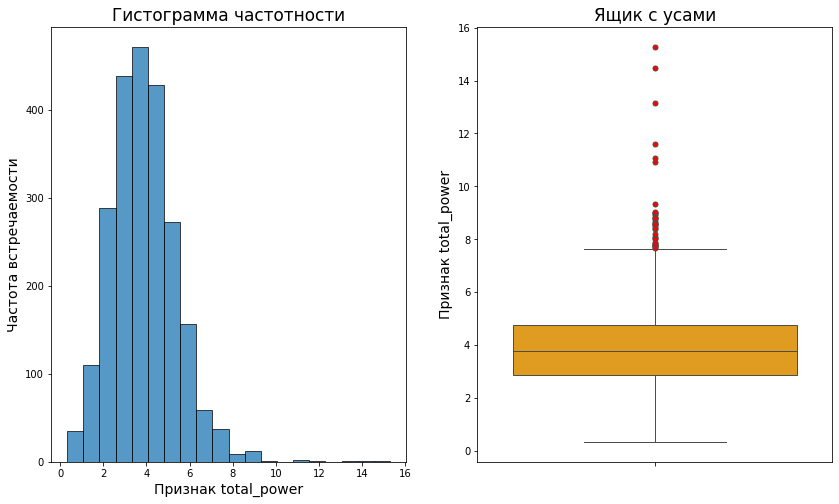


Статистические характеристики признака total_reactive_power


count    2325.000000
mean        2.300941
std         0.903664
min         0.196228
25%         1.670519
50%         2.225398
75%         2.829159
max         8.949049
Name: total_reactive_power, dtype: float64

Мода признака total_reactive_power: 1.080773



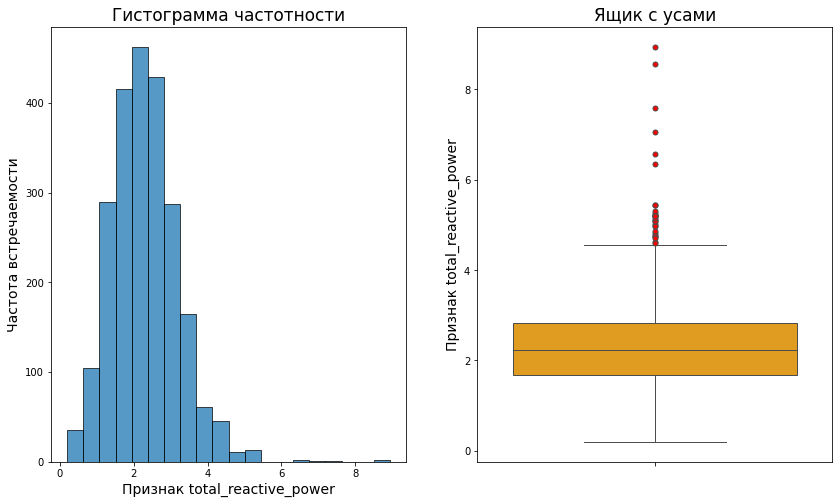


Статистические характеристики признака bulk_3


count    2325.000000
mean       47.296774
std        75.228262
min         0.000000
25%         0.000000
50%         0.000000
75%        80.000000
max       454.000000
Name: bulk_3, dtype: float64

Мода признака bulk_3: 0.0



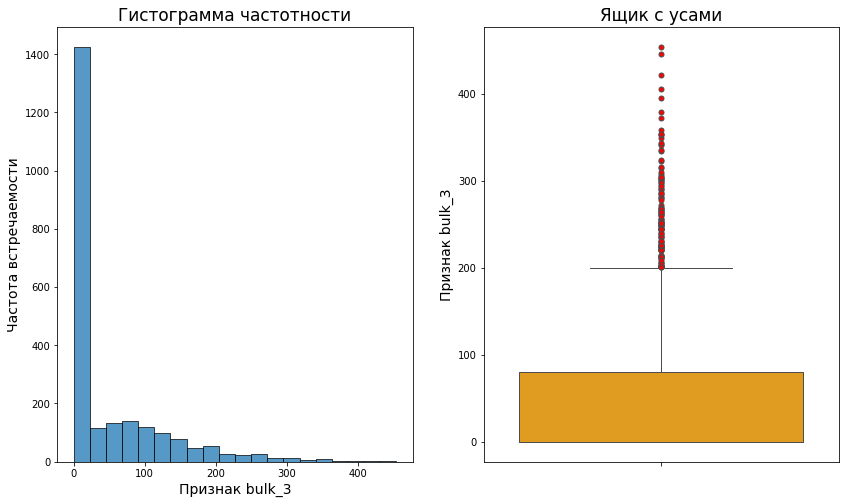


Статистические характеристики признака bulk_4


count    2325.000000
mean       37.331613
std        58.670377
min         0.000000
25%         0.000000
50%         0.000000
75%        77.000000
max       281.000000
Name: bulk_4, dtype: float64

Мода признака bulk_4: 0.0



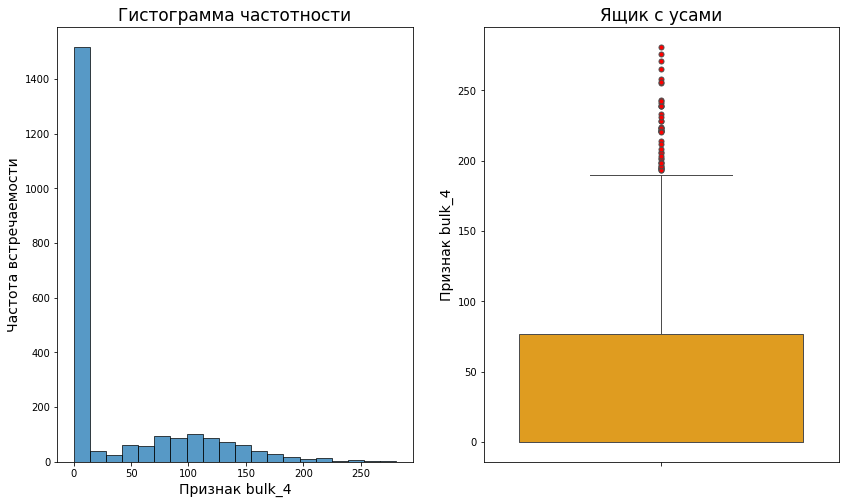


Статистические характеристики признака bulk_12


count    2325.000000
mean      208.507957
std       157.137873
min         0.000000
25%       105.000000
50%       206.000000
75%       283.000000
max      1849.000000
Name: bulk_12, dtype: float64

Мода признака bulk_12: 0.0



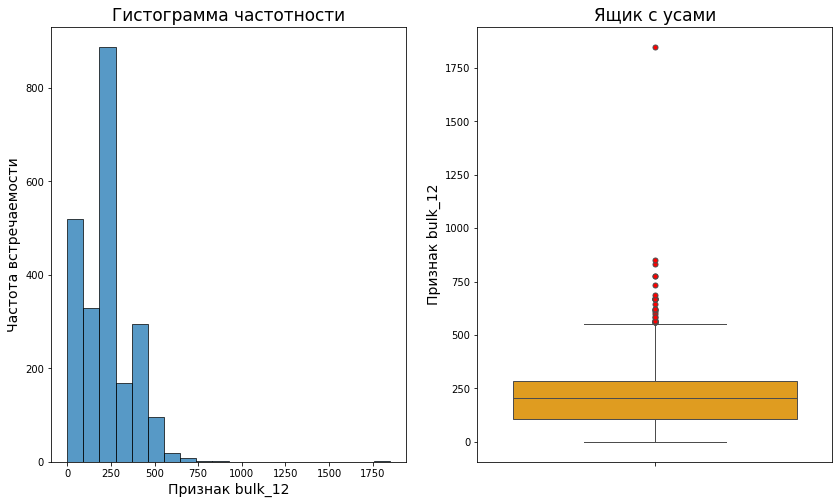


Статистические характеристики признака bulk_14


count    2325.000000
mean      153.971613
std        81.398153
min         0.000000
25%       105.000000
50%       149.000000
75%       204.000000
max       636.000000
Name: bulk_14, dtype: float64

Мода признака bulk_14: 0.0



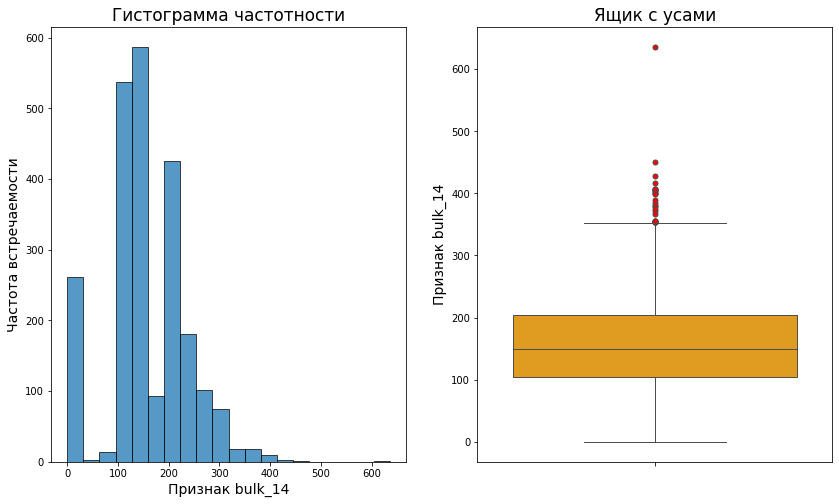


Статистические характеристики признака bulk_15


count    2325.000000
mean      120.026667
std        84.674380
min         0.000000
25%         0.000000
50%       107.000000
75%       204.000000
max       405.000000
Name: bulk_15, dtype: float64

Мода признака bulk_15: 0.0



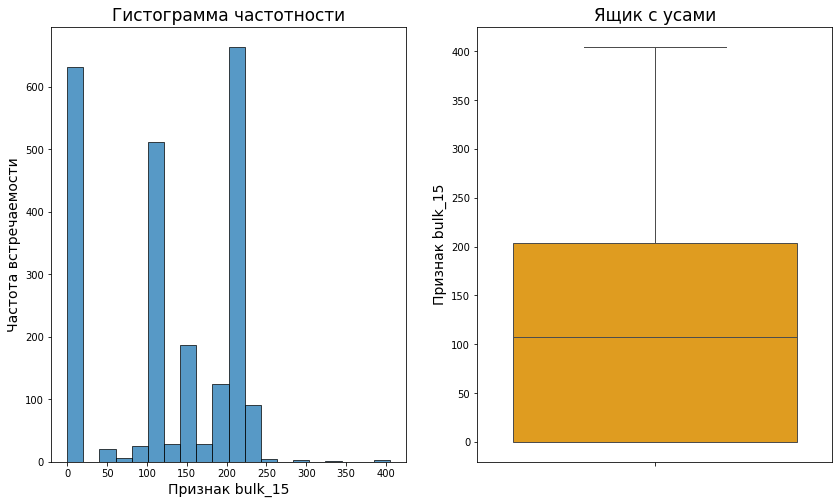


Статистические характеристики признака gas_1


count    2325.000000
mean       11.378942
std         6.395632
min         0.008399
25%         7.282948
50%        10.100950
75%        14.217691
max        77.995040
Name: gas_1, dtype: float64

Мода признака gas_1: 0.0083985291



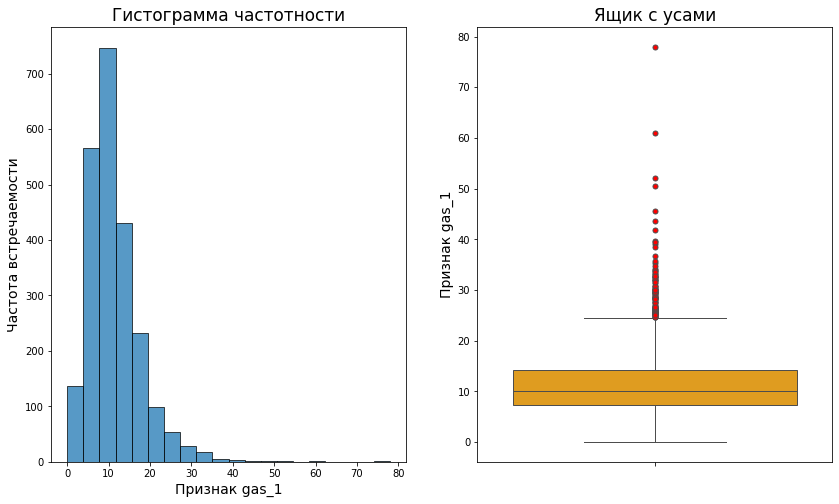


Статистические характеристики признака first_temp


count    2325.000000
mean     1587.365161
std        23.623144
min      1519.000000
25%      1571.000000
50%      1587.000000
75%      1603.000000
max      1660.000000
Name: first_temp, dtype: float64

Мода признака first_temp: 1588.0



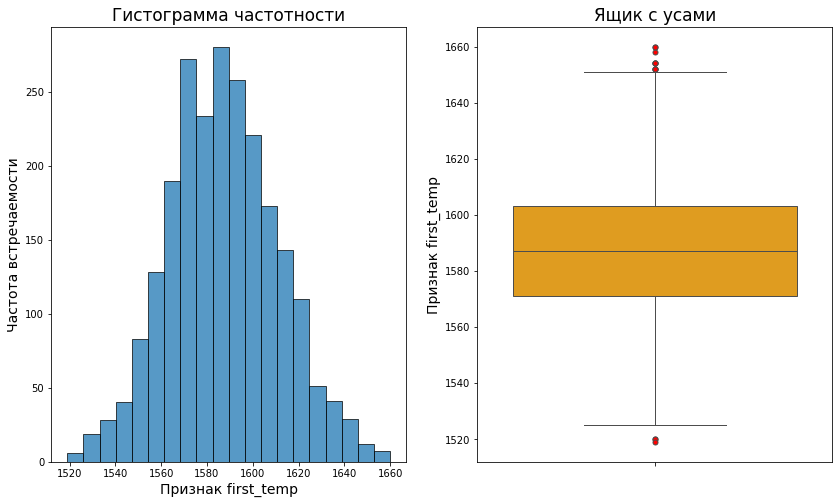


Статистические характеристики признака last_temp


count    2325.000000
mean     1593.366022
std        11.209581
min      1541.000000
25%      1587.000000
50%      1593.000000
75%      1598.000000
max      1653.000000
Name: last_temp, dtype: float64

Мода признака last_temp: 1593.0



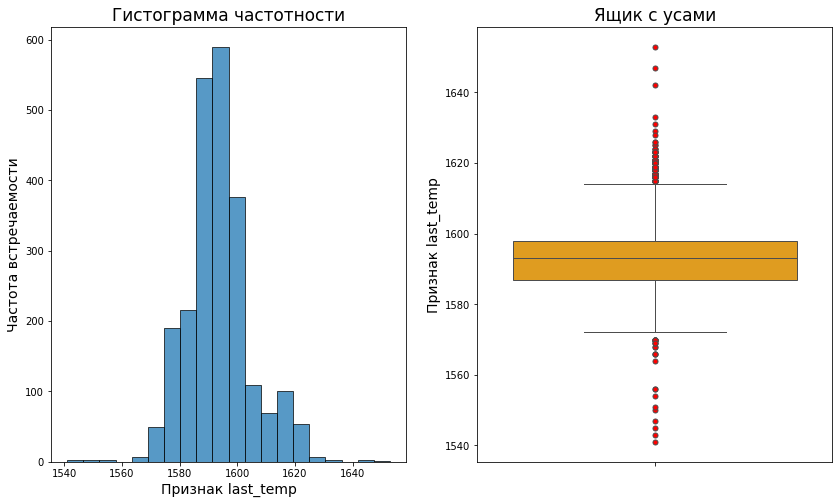


Статистические характеристики признака delta_time_temp


count     2325.000000
mean      2323.419785
std       1385.569302
min        339.000000
25%       1581.000000
50%       2046.000000
75%       2793.000000
max      23674.000000
Name: delta_time_temp, dtype: float64

Мода признака delta_time_temp: 1598.0



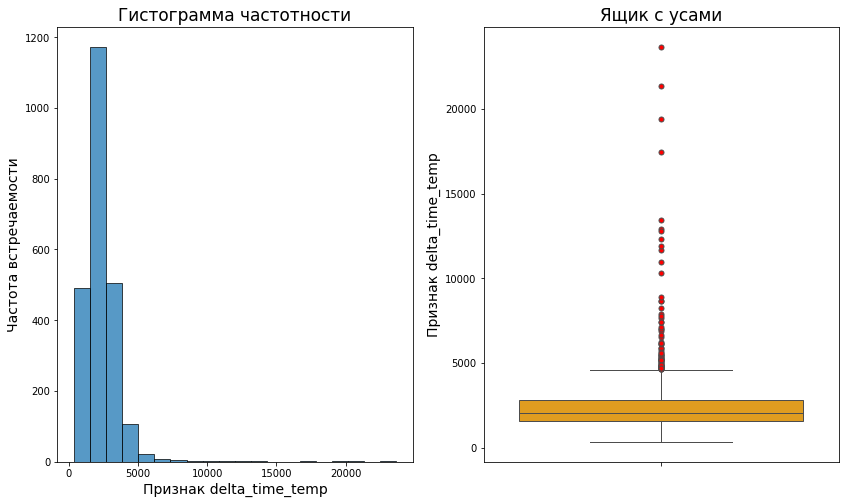


Статистические характеристики признака wire_1


count    2325.000000
mean      102.412198
std        43.535263
min         0.000000
25%        73.207679
50%       101.087998
75%       128.069763
max       330.314424
Name: wire_1, dtype: float64

Мода признака wire_1: 0.0



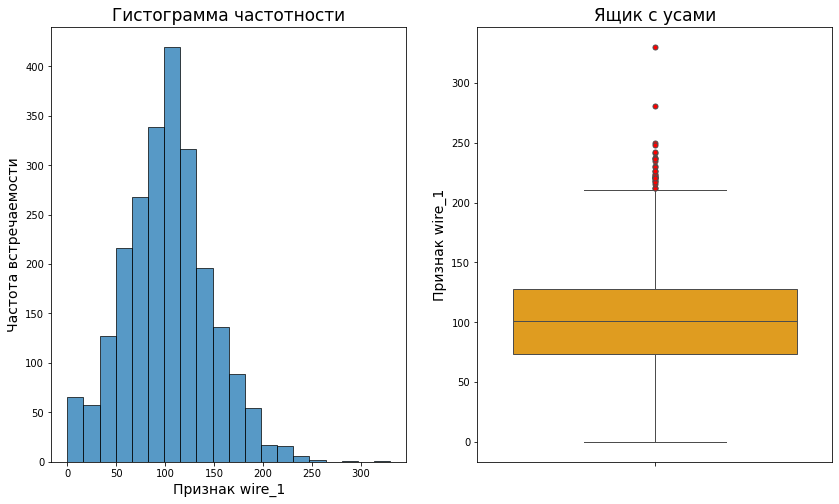


Статистические характеристики признака wire_2


count    2325.000000
mean       17.605637
std        33.642919
min         0.000000
25%         0.000000
50%         0.000000
75%        23.102560
max       282.780152
Name: wire_2, dtype: float64

Мода признака wire_2: 0.0



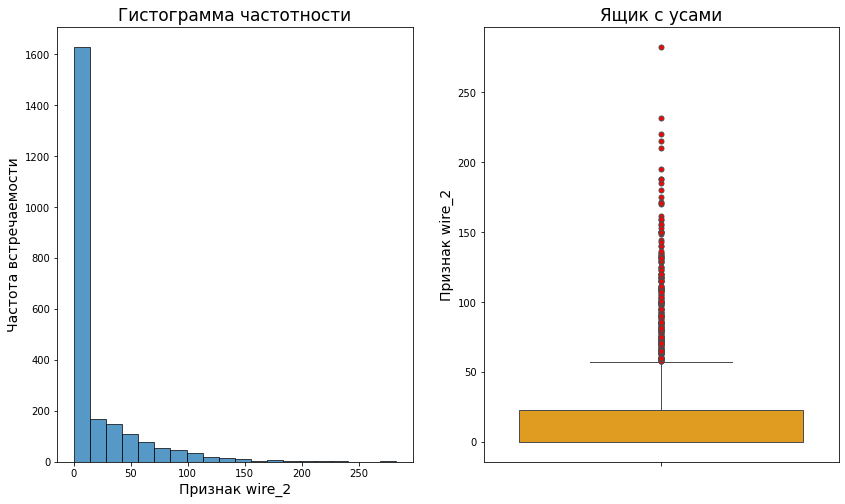

In [47]:
analysis_num(df_itog, 20)

Как и на 2 шаге исследовательсого анализа, после предобработки данных сохранились теже принципы:

> Большенсвто признаков имеют нессиметричное распределение со смещением влево

> Почти у всех признаков наблюдается достаточно большое количество выбросов

> Все признаки лежат в допустимых диапозонах

Есть признаки, которые выделяются:

- ***bulk_15***  - имеет несколько пиков (плотность распределения со скачками) и не имеет выбросов вовсе

- ***first_temp*** - имеет нормальное распределение и сравнительно маленькое количество выбросов

Графически все данные являются приемлемыми

<a id='section_20'></a>

### Корреляционный анализ итогового датафрейма

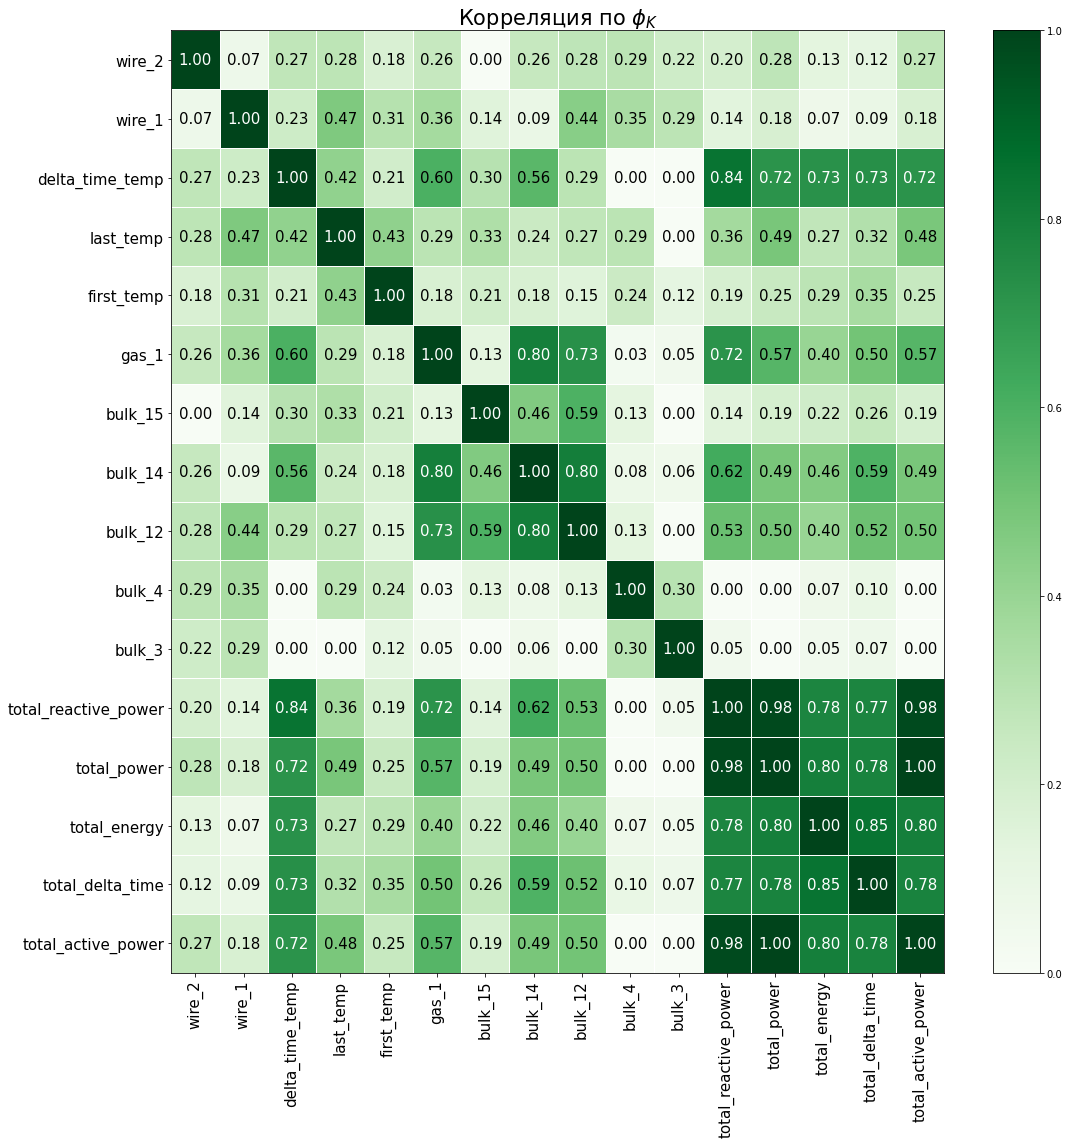

In [47]:
interval_cols = list(df_itog.columns)

phik_overview = phik_matrix(df_itog, interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция по $\phi_K$',
    fontsize_factor=1.5,
    figsize=(16, 16)
)

> Целевой признак - это последняя замеренная температура: ***last_temp***

> Мультиколлинеарность наблюдается между признаками отвечающими ***total_active_power, total_power, total_reactive_power*** и состовляет **0.98-1**

<a id='section_21'></a>

### Вывод

Исследовательский анализ итогового (объединенного) датафрейма показал, что графически и статистически данные сохранили свои показатели, все также наблюдаются определенные закономерности распределений, выбросов. Проведя корреляционный анализ между целевым признаком (***last_temp***) и входными - сильной корреляции не обнаружилось. В свою очередь была выявлена мультиколлинеарность между входными признаками мощности. Данные признаки на этом этапе пока что удалять не будем, возможно модель линейной регрессии использовать не будем (поэтому линейные зависимости не так важны).

## Подготовка данных

In [48]:
df_itog.columns

Index(['total_active_power', 'total_delta_time', 'total_energy', 'total_power',
       'total_reactive_power', 'bulk_3', 'bulk_4', 'bulk_12', 'bulk_14',
       'bulk_15', 'gas_1', 'first_temp', 'last_temp', 'delta_time_temp',
       'wire_1', 'wire_2'],
      dtype='object')

In [49]:
#Задаем список с именами количественных переменныхх:
num_columns = ['total_active_power', 'total_delta_time', 'total_energy', 
               'total_power', 'total_reactive_power', 'bulk_3', 
               'bulk_4', 'bulk_12', 'bulk_14', 'bulk_15', 'gas_1', 
               'first_temp', 'delta_time_temp', 'wire_1', 'wire_2']

> Разделим датафрейм на обучающую и тестовую выборки в соотношении 1 к 4:

In [50]:
train, test = train_test_split(df_itog,
                               test_size=TEST_SIZE, 
                               random_state=RANDOM_STATE)

print(f'Размер итогового датафрейма: {df_itog.shape}')
print(f'Размер тренировночной выборки: {train.shape}')
print(f'Размер тестовой выборки: {test.shape}')

Размер итогового датафрейма: (2325, 16)
Размер тренировночной выборки: (1743, 16)
Размер тестовой выборки: (582, 16)


In [51]:
X_train = train.drop(columns=['last_temp'])
y_train = train['last_temp']

X_test = test.drop(columns=['last_temp'])
y_test = test['last_temp']

> Создадим своб функцию для подсчёта метрики:

In [52]:
#Создадим свою метрику для вычисления MAE:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

## Обучение моделей

<a id='section_22'></a>

### Дерево регрессии

In [53]:
data_preprocessor = ColumnTransformer(
    [('num', MinMaxScaler(), num_columns)],
    remainder='passthrough'
)

pipe_tree = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('model', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
)

param_tree = { 
    'model__max_depth': [None] + [i for i in range(2, 10)], 
    'model__max_features': range(10, 15), 
    'model__min_samples_split': range(2, 10), 
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
}

randomized_search_tree = RandomizedSearchCV(pipe_tree, 
                                            param_tree, 
                                            cv=7, 
                                            scoring=mae_scorer, 
                                            random_state=RANDOM_STATE, 
                                            n_iter=50, 
                                            n_jobs=-1)

In [54]:
%%time

randomized_search_tree.fit(X_train, y_train)

pipe_model_tree = randomized_search_tree.best_estimator_

print(f'Лучшая модель и её параметры:\n\n {pipe_model_tree}')
print(f'Среднее значение метрики MAE модели на кросс-валидации: {abs(round(randomized_search_tree.best_score_, 2))}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['total_active_power',
                                                   'total_delta_time',
                                                   'total_energy',
                                                   'total_power',
                                                   'total_reactive_power',
                                                   'bulk_3', 'bulk_4',
                                                   'bulk_12', 'bulk_14',
                                                   'bulk_15', 'gas_1',
                                                   'first_temp',
                                                   'delta_time_temp', 'wire_1',
                                                   'wire_2'])])),
                ('mode

<a id='section_23'></a>

### kNN

In [55]:
pipe_knn = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('model', KNeighborsRegressor())
    ]
)

param_knn = {
    'model__n_neighbors': range(1, 41), 
    'model__weights': ['uniform', 'distance'], 
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }

randomized_search_knn = RandomizedSearchCV(pipe_knn, 
                                            param_knn, 
                                            cv=7, 
                                            scoring=mae_scorer, 
                                            random_state=RANDOM_STATE, 
                                            n_iter=50, 
                                            n_jobs=-1)

In [56]:
%%time

randomized_search_knn.fit(X_train, y_train)

pipe_model_knn = randomized_search_knn.best_estimator_

print(f'Лучшая модель и её параметры:\n\n {pipe_model_knn}')
print(f'Среднее значение метрики MAE модели на кросс-валидации: {abs(round(randomized_search_knn.best_score_, 2))}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['total_active_power',
                                                   'total_delta_time',
                                                   'total_energy',
                                                   'total_power',
                                                   'total_reactive_power',
                                                   'bulk_3', 'bulk_4',
                                                   'bulk_12', 'bulk_14',
                                                   'bulk_15', 'gas_1',
                                                   'first_temp',
                                                   'delta_time_temp', 'wire_1',
                                                   'wire_2'])])),
                ('mode

<a id='section_24'></a>

### Случайный лес

In [57]:
pipe_forest = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('model', RandomForestRegressor(random_state=RANDOM_STATE))
    ]
)

param_forest = { 
    'model__n_estimators': [10, 50, 100], 
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }

randomized_search_forest = RandomizedSearchCV(pipe_forest, 
                                            param_forest, 
                                            cv=7, 
                                            scoring=mae_scorer, 
                                            random_state=RANDOM_STATE, 
                                            n_iter=30, 
                                            n_jobs=-1)

In [58]:
%%time

randomized_search_forest.fit(X_train, y_train)

pipe_model_forest = randomized_search_forest.best_estimator_

print(f'Лучшая модель и её параметры:\n\n {pipe_model_forest}')
print(f'Среднее значение метрики MAE модели на кросс-валидации: {abs(round(randomized_search_forest.best_score_, 2))}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['total_active_power',
                                                   'total_delta_time',
                                                   'total_energy',
                                                   'total_power',
                                                   'total_reactive_power',
                                                   'bulk_3', 'bulk_4',
                                                   'bulk_12', 'bulk_14',
                                                   'bulk_15', 'gas_1',
                                                   'first_temp',
                                                   'delta_time_temp', 'wire_1',
                                                   'wire_2'])])),
                ('model'

<a id='section_25'></a>

### SVR

In [59]:
pipe_svr = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('model', SVR(kernel='rbf'))
    ]
    
)

param_svr = { 
    'model__C': [0.1, 1, 10, 100], 
    'model__gamma': ['scale', 'auto', 0.01, 0.1, 1], 
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }

randomized_search_svr = RandomizedSearchCV(pipe_svr, 
                                            param_svr, 
                                            cv=7, 
                                            scoring=mae_scorer, 
                                            random_state=RANDOM_STATE, 
                                            n_iter=50, 
                                            n_jobs=-1)

In [60]:
%%time

randomized_search_svr.fit(X_train, y_train)

pipe_model_svr = randomized_search_svr.best_estimator_

print(f'Лучшая модель и её параметры:\n\n {pipe_model_svr}')
print(f'Среднее значение метрики MAE модели на кросс-валидации: {abs(round(randomized_search_svr.best_score_, 2))}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['total_active_power',
                                                   'total_delta_time',
                                                   'total_energy',
                                                   'total_power',
                                                   'total_reactive_power',
                                                   'bulk_3', 'bulk_4',
                                                   'bulk_12', 'bulk_14',
                                                   'bulk_15', 'gas_1',
                                                   'first_temp',
                                                   'delta_time_temp', 'wire_1',
                                                   'wire_2'])])),
                ('mode

<a id='section_26'></a>

### CatBoost

In [61]:
pipe_catboost = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('model', CatBoostRegressor(depth=8, random_seed=RANDOM_STATE, verbose=False))
    ]
    
)

param_catboost = {
        'model__iterations': [20, 30, 50],
        'model__learning_rate': [0.05, 0.1, 0.2],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
}

randomized_search_catboost = RandomizedSearchCV(pipe_catboost, 
                                                param_catboost, 
                                                cv=5, 
                                                scoring=mae_scorer, 
                                                random_state=RANDOM_STATE, 
                                                n_iter=30, 
                                                n_jobs=-1)

In [62]:
%%time

randomized_search_catboost.fit(X_train, y_train)

pipe_model_catboost = randomized_search_catboost.best_estimator_

print(f'Лучшая модель и её параметры:\n\n {pipe_model_catboost}')
print(f'Среднее значение метрики MAE модели на кросс-валидации: {abs(round(randomized_search_catboost.best_score_, 2))}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['total_active_power',
                                                   'total_delta_time',
                                                   'total_energy',
                                                   'total_power',
                                                   'total_reactive_power',
                                                   'bulk_3', 'bulk_4',
                                                   'bulk_12', 'bulk_14',
                                                   'bulk_15', 'gas_1',
                                                   'first_temp',
                                                   'delta_time_temp', 'wire_1',
                                                   'wire_2'])])),
                ('mode

## Выбор лучшей модели

<a id='section_27'></a>

### Лучшая модель

| Модель | Метрика MAE на CV  |
|:------------:|:---------------:|
| DecisionTreeRegressor | 7.29 |
| KNN | 6.85 |
| Random Forest Regressor | 6.19 |
| SVR | 5.85 |
| CatBoost | 6.24 |

> По метрике MAE на кросс-валидации лучшая модель - ***SVR***

<a id='section_28'></a>

###  Метрика на тестовой выборке

Чтобы оценить адекватность лучшей модели, сравним метрику MAE лучшей модели, полученную на тестовой выборке, с метрикой MAE DummyRegressor (модель, которая всегда предсказывает средние значения).

In [63]:
dummy_model = DummyRegressor(strategy='median')
dummy_model.fit(X_train, y_train)

dummy_mae = mae_scorer(dummy_model, X_test, y_test)
mae_test = mae_scorer(pipe_model_svr, X_test, y_test)

print(f'Значение метрики MAE на тестовой выборке dummy-модели: {abs(round(dummy_mae, 2))}')
print(f'Значение метрики MAE на тестовой выборке лучшей модели: {abs(round(mae_test, 2))}')

Значение метрики MAE на тестовой выборке dummy-модели: 8.29
Значение метрики MAE на тестовой выборке лучшей модели: 5.86


<a id='section_29'></a>

### Анализ важности признаков

Перед анализом важности признаков преобразуем тестовую выборку:

In [64]:
X_train_new = pipe_svr.named_steps['preprocessor'].fit_transform(X_train)
X_test_new = pipe_svr.named_steps['preprocessor'].transform(X_test)
feature_names = pipe_model_svr.named_steps['preprocessor'].transformers_

svr_model = pipe_model_svr.named_steps['model']

svr_model

SVR(C=100, gamma=0.01)

In [65]:
feature_names[0][2]

['total_active_power',
 'total_delta_time',
 'total_energy',
 'total_power',
 'total_reactive_power',
 'bulk_3',
 'bulk_4',
 'bulk_12',
 'bulk_14',
 'bulk_15',
 'gas_1',
 'first_temp',
 'delta_time_temp',
 'wire_1',
 'wire_2']

In [66]:
feature_names = feature_names[0][2]

In [67]:
X_kmeans = shap.kmeans(X_test_new, 10)
explainer = shap.KernelExplainer(svr_model.predict, X_kmeans)

X_test_new = pd.DataFrame(X_test_new)
X_test_new.columns = feature_names

X_test_sample = shap.sample(X_test_new, 50)
shap_values = explainer.shap_values(X_test_sample)

  0%|          | 0/50 [00:00<?, ?it/s]

> Построение SHAP

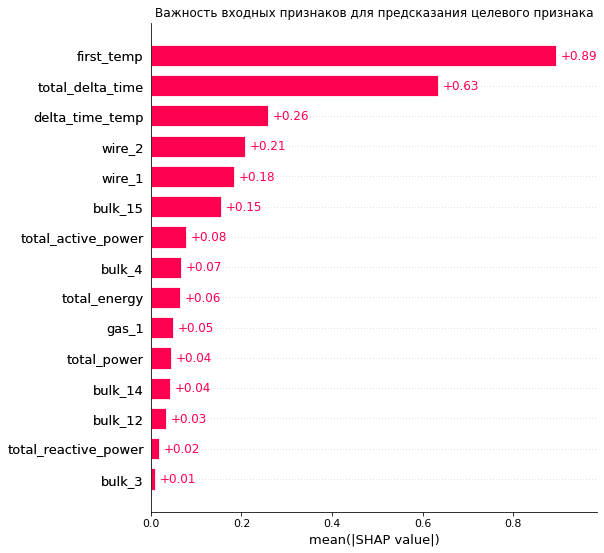

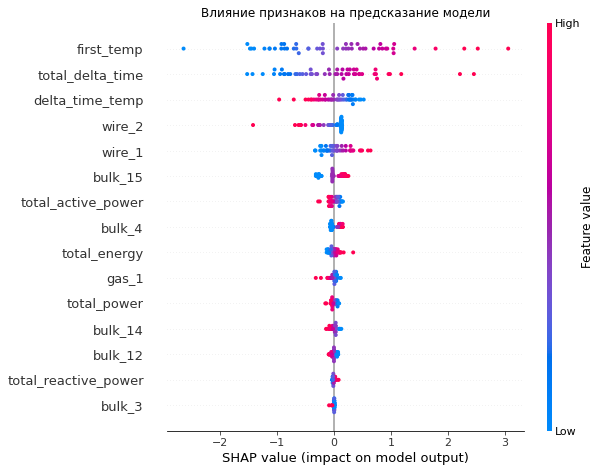

In [68]:
shap_values = shap.Explanation(values=shap_values, data=X_test_sample, feature_names=feature_names)

plt.title("Важность входных признаков для предсказания целевого признака")
shap.plots.bar(shap_values, max_display=50)

plt.title("Влияние признаков на предсказание модели")
shap.plots.beeswarm(shap_values, max_display=50)

График распределения SHAP-значений отображает SHAP-значения каждого признака для всех примеров в наборе данных. Анализируя график, можно отметить:

> Наибольшее влияние на предсказания модели вносят признаки ***first_temp, total_delta_time, delta_time_temp***

> Признак ***first_temp*** - высокие значения скланяют модель на предсказания больших знаечний, низнкие - на низкие, аналогично для признака ***total_delta_time***. В свою очередь у признака ***delta_time_temp*** дела обстоят наооборот, данных признак при низких значениях стягивает модель к предсказанию высокой температуры, а высокие значения - к низкой

<a id='section_30'></a>

### Вывод

**1. Была определена лучшая модель:**

- Лучше всего себя показала модель SVR(C=100, gamma=0.01, kernel='rbf'). Значение метрики MAE на кросс-валидации 5.85

**2. Был выполнена проверка адекватности модели:**

- Значение метрики MAE dummy-модели на тестовой выборке значительно хуже чем у подобранной модели: 8.29 против 5.86

**3. Был выполнен анализ важности признаков:**

- Из анализа было выявленно, что ключевые признаки, которые влияют на предсказания модели это: 

- ***first_temp***
- ***total_delta_time*** 
- ***delta_time_temp***

Получается, на предсказание температуры влияет: 

- Время (общая продолжительность обработки) и температура (начальная температура и время между первым и последним замерами температуры) оказывают наибольшее влияние на предсказания конечной температуры сплава

## Итоговый вывод

> **Загрузка данных**
---

Во всех датафреймах обнаружены:

- Пропуски в данных, 
- Некорректные типы данных,
- Некорректные названия признаков

Данные недочеты были устранены или обозначены для дальнейшей обработки на данном этапе

---
> **Исследовательский анализ и предобработка данных**
---
Исследовательский анализ показал, что данные в общей целостности достаточно хорошие, есть определенные закономерности, которые отслеживались у большинства данных, а именно:

1. Данные имеют отличное от нормального распредление, которое смещено влево

2. Во всех данных присутствуют выбросы

3. Данные лежат в допустимы интервалах (отсутсвие аномальных знаечний)

---
> **Объединение данных**
---

- Размер итогового датафрейма (2325, 16).
- Пропусков в итоговом датафрейме не обнаружено: признаки с количеством пропусков более 80% были удалены, остальные пропуски в признаках сыпучих и проволочных материалов заменены на нули.
- Из датафрейма "Результаты измерения температуры" были выделены два признака: входной - первая измперенная температура "first_temp" и целевой - последняя измеренная температура "last_temp".
- Были сгенерированы новые признаки: полная мощность - "total_power", работа - "total_energy", время между первым и последним замерами температуры - "delta_time_temp".
- Был удален признак "key".

---
> **Исследовательский анализ и предобработка данных объединённого датафрейма**
---

Исследовательский анализ объединненых данных показал схожие статистики, что и при исследовательском анализе данных по отдельным датафреймам. Пропуски были полностью исключены. Также был проведен корреляционный анализ, который показал, что есть признаки с мультиколлинеарностью, но удаление данных признаков мы отложили, т.к. не стали использовать модель линейной регрессии

---
> **Подготовка данных**
---

На данном этапе был составлен список имен количественных переменных, для дальнейшей обработки в пайплайне. Также на данном этапе произведена разбивка данных на обучающую и тестовую выборки в соотношении 1 к 4.

---
> **Обучение моделей**
---

Для обучения было принято решение выбрать 5-ть моделей:

- Дерево регрессии

- kNN

- Случайный лес

- SVR

- CatBoost

Данные модели показали себя хорошо в рамках решения поставленной задачи. Для каждой модели были подсчитаны метрики MAE на кросс-валидации

---
> **Выбор лучшей модели**
---

Таблица с результатами метрики MAE, для выбранных моделей:

| Модель | Метрика MAE на CV  |
|:------------:|:---------------:|
| DecisionTreeRegressor | 7.29 |
| KNN | 6.85 |
| Random Forest Regressor | 6.19 |
| SVR | 5.85 |
| CatBoost | 6.24 |


По результатам моделирования лучшую метрику дала модель ***SVR*** с **гиперпараметрами (C=100, gamma=0.01)** и значением метрки на кросс-валидации равной **5.85**. 


На тестовой выборке данная модель показала результат **5.86**, что очень хорошо, сравнивая с dummy-моделью, которая показала **8.29**


Также был проведен **SHAP анализ**, который показал какие признаки больше всего влияют на предсказания модели, ими оказались:

- ***first_temp*** 
- ***total_delta_time*** 
- ***delta_time_temp***

> Время (общая продолжительность обработки) и температура (начальная температура и время между первым и последним замерами температуры) оказывают наибольшее влияние на предсказания конечной температуры сплава

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ МЕНТОРА</b></u></p>
ОК, Сергей, отличная работа!!! Тут и аналитика, и графика, и рассуждения. При этом в меру, достаточно и аргументированно. С уверенностью можно сказать, что пройден весь алгоритм моделирования от анализа исходной инфо до анализа важности факторов.<br> Как-то так получилось, что и придраться не к чему) Оставил не большой коммент по мультиколлинеаности, глянь. пожалуйста.<br>
 
 
Также, всегда стараюсь на этом проекте сказать всем вот ещё что: цель заказчика - экономия энергоресурсов.<br>
И в этом проекте искали как раз способ точно предсказывать температуру. И круто использовали для этого весь арсенал<br>
А если рассудать с позиции такой: а что нужно сделать, чтобы снизить энергопотребление?<br>
Судя по модели, самым важным фактором является первая температура. Это значит, что управляя ею, мы сможем управлять энергозатратами. Вывод понятен. Теперь надо разработать мероприятия для этого решения. И тут вопрос возникает скм собой: а это так точно? мы можем управлять первой температурой? В общем, наша модель - только начало работы над энергоэффективностью.<br>
    
Так же есть ещё одна идея, которую хотел предложить тебе на обсуждение.<br>
Возможно, покажется интересным<br><br> 

Дело касается принципиально иного подхода к поиску решения для снижения энергопотребления на производстве<br>
Смотри, Создание данной модели (таково было задание) двигалось по пути "угадывания" температуры<br>
Но мы же знаем жизнь)) лёгкие колебания температур (как и нашего настроения, нашего веса.....)<br>
есть всегда. Более того - будут вегда! И нам что, стараться угадывать их?<br>
Не угонимся, "пупок" развяжется))))) <br>
Предложу для подобных проектов подумать вот в какую сторону<br>
    
Итак, разброс в измерениях - есть, был и будет!! (т.к. этому благоприятствует разнообразие факторов самого проиозводства)<br>
    Тогда задачу можно поставить так: <u>надо уменьшить разброс в измерениях</u>. В данном случае в температуре.<br>
Один из подходов такой: Наверняка есть границы, в пределах которых колебания температур - дело нормальное.<br>
А что, если фикировать случаи, когда температура выходит за эти границы?<br>
Скажем, как "1". И тогда для таких моментов времени собирать инфо по производству: <br>
а что был за материал (химия материала), что был за газ (химический состав газа), какая бригада работала, <br>
что там было с электродами, ограничения только в фантазиях ну и в знаниях самого производства..... <br>
И вот тут можем реально находить причины (через корреляции, проверки гипотез, разные модельки...), фиксировать эти причины. <br>
Ну и разрабатывать энергосберегательные мероприятия.<br><br>
 
Это было отступление)<br>    
По проекту - у меня нет вопросов)<br>
Может у тебя остались/появились?<br>